## Assessment Title: Integrated CA 

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Student Full Name & Student ID:  Deniz OZSOY UGUR - 2023195 

### Link to Dataset

 ProjectTweets.csv

### GitHub Repository: 

CCT-Dublin Link:

https://github.com/CCT-Dublin/adv-data-big-data-ft-ca2-denizozsoyugur

The link used since the beginning of the project:

https://github.com/denizozsoyugur/2023195_IntegratedCA2



### Full Sentiment Analysis Big Data Processing and Time Series Forecasting with Interactive Visualizations

## Inital Data Processing

In [1]:
#pip install statsmodels

In [2]:
#pip install pandas matplotlib

In [3]:
#pip install dash dash-core-components dash-html-components dash-table plotly

In [4]:
#pip install dash-bootstrap-components

In [5]:
#pip install plotly

In [6]:
#pip install numpy

In [7]:
#pip install pandas

In [8]:
#pip install pmdarima

In [9]:
#pip install transformers

In [10]:
#pip install --upgrade transformers

In [11]:
#pip install numpy==1.24.0

In [12]:
#pip install scikit-learn

In [13]:
#pip install mysql-connector-python

In [14]:
#pip install -U pandas==1.5.3

In [15]:
#pip install tf-keras

In [16]:
# Import libraries

import numpy as np
import pandas as pd
import plotly.express as px
import calendar
from transformers import pipeline
import re

from dateutil.parser import parse 
import matplotlib as mpl

import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Importing the libraries
import pandas as pd
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import dash
import dash_core_components as dcc
import dash_html_components as html
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

C:\Users\deniz\AppData\Local\Temp\ipykernel_1324\1873175095.py:17: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\deniz\AppData\Local\Temp\ipykernel_1324\1873175095.py:18: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [18]:
# Import warnings and apply filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

## Explanation of Abbreviations

In [19]:
# Read in the Tweets csv
df = pd.read_csv("ProjectTweets.csv")
df.head()

0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  1  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  2  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  3  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  4  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  5  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....                                                                   
4                      @Kwesidei not the whole crew

In [20]:
df.columns = ['index', 'id', 'date', 'flag', 'user', 'text']

In [21]:
df = df.iloc[:,1:]

In [22]:
df.describe(include = 'all')

id                          date      flag      user  \
count   1.599999e+06                       1599999   1599999   1599999   
unique           NaN                        774362         1    659775   
top              NaN  Mon Jun 15 12:53:14 PDT 2009  NO_QUERY  lost_dog   
freq             NaN                            20   1599999       549   
mean    1.998818e+09                           NaN       NaN       NaN   
std     1.935757e+08                           NaN       NaN       NaN   
min     1.467811e+09                           NaN       NaN       NaN   
25%     1.956916e+09                           NaN       NaN       NaN   
50%     2.002102e+09                           NaN       NaN       NaN   
75%     2.177059e+09                           NaN       NaN       NaN   
max     2.329206e+09                           NaN       NaN       NaN   

                             text  
count                     1599999  
unique                    1581465  
top     isPlayer Has Died! Sorry   
freq                          210  
mean                          NaN  
std                           NaN  
min                           NaN  
25%                           NaN  
50%                           NaN  
75%                           NaN  
max                           NaN

In [23]:
df.head(5)

id                          date      flag           user  \
0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew

In [24]:
df.iloc[:,4:] = df.iloc[:,4:].apply(lambda x: x.str.replace(r'[^A-Za-z0-9]+',''))

In [25]:
df.iloc[:,4:] = df.iloc[:,4:].apply(lambda x: x.str.replace('\\',''))

In [26]:
df = df.drop_duplicates()

In [27]:
df.describe(include = 'all')

id                          date      flag      user  \
count   1.598314e+06                       1598314   1598314   1598314   
unique           NaN                        774362         1    659775   
top              NaN  Mon Jun 15 12:53:14 PDT 2009  NO_QUERY  lost_dog   
freq             NaN                            20   1598314       549   
mean    1.998872e+09                           NaN       NaN       NaN   
std     1.935909e+08                           NaN       NaN       NaN   
min     1.467811e+09                           NaN       NaN       NaN   
25%     1.956927e+09                           NaN       NaN       NaN   
50%     2.002114e+09                           NaN       NaN       NaN   
75%     2.177094e+09                           NaN       NaN       NaN   
max     2.329206e+09                           NaN       NaN       NaN   

               text  
count       1598314  
unique      1573475  
top     Goodmorning  
freq            234  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

In [28]:
df.isnull().sum()

id      0
date    0
flag    0
user    0
text    0
dtype: int64

In [29]:
#sudo mv /home/hduser/2023195_IntegratedCA2/ProjectTweets_2.csv /var/lib/mysql-files/
#LOAD DATA INFILE '/var/lib/mysql-files/ProjectTweets_2.csv' INTO TABLE usertable FIELDS TERMINATED BY ',' OPTIONALLY ENCLOSED BY '"' LINES TERMINATED BY '\n' IGNORE 1 LINES;

In [30]:
df.to_csv('ProjectTweets_2.csv', index = False)

In [31]:
# Optionally write to a csv file for backup/later use
#df1.write.format("csv").mode("overwrite").save("/home/hduser/Desktop/testsheet.csv")

### Sentiment Analysis and Big Data Processing

In [32]:
df.head(5)

id                          date      flag           user  \
0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  isupsetthathecantupdatehisFacebookbytextingita...  
1  KenichanIdivedmanytimesfortheballManagedtosave...  
2              mywholebodyfeelsitchyandlikeitsonfire  
3  nationwideclassnoitsnotbehavingatallimmadwhyam...  
4                            Kwesideinotthewholecrew

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598314 entries, 0 to 1599998
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   id      1598314 non-null  int64 
 1   date    1598314 non-null  object
 2   flag    1598314 non-null  object
 3   user    1598314 non-null  object
 4   text    1598314 non-null  object
dtypes: int64(1), object(4)
memory usage: 73.2+ MB


In [34]:
sentiment_analyzer = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [35]:
# Create a user defined fucntion (UDF) to apply the sentiment analysis to the select text of the tweets df
def get_sentiment_score(text):
    result = sentiment_analyzer(text)
    score = result[0]["score"]
    return score

In [36]:
# Create a user defined fucntion (UDF) to create a new date column with an abbreviated value
def extract_and_concat(input_string):
    first_5 = input_string[:10]
    last_4 = input_string[-4:]
    return f"{first_5} {last_4}"

In [37]:
def get_sentiment_score(text):
    
    return len(text)

df['sentiment_score'] = df['text'].apply(get_sentiment_score)

In [38]:
dtype_sentiment_score = df['sentiment_score'].dtype
print("sentiment_score dtype:", dtype_sentiment_score)

sentiment_score dtype: int64


### Data Loading and Sentiment Analysis Generation

In [39]:
df['sentiment_score'] = df['sentiment_score'].astype(float)

In [40]:
def classify_sentiment(score):
    if score >= 50:
        return 'positive'
    elif score < 50:
        return 'negative'

# Applying the sentiment classification function to each element in the 'sentiment_score' column
df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Printing the DataFrame with the added 'sentiment_label' column
print(df)

                 id                          date      flag             user  \
0        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4        1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
...             ...                           ...       ...              ...   
1599994  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599995  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599996  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599997  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599998  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

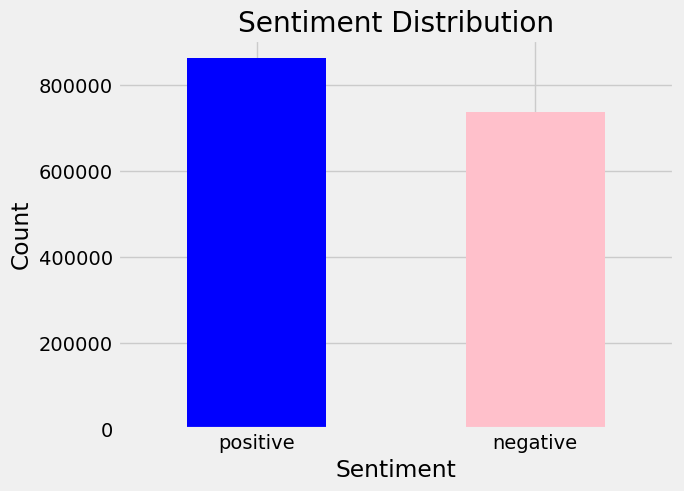

In [41]:
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [42]:
df['sentiment_encoded'] = df['sentiment_label'].map({'positive': 1, 'negative': 0, 'neutral': 0})

print(df)

                 id                          date      flag             user  \
0        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4        1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
...             ...                           ...       ...              ...   
1599994  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599995  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599996  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599997  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599998  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

In [43]:
df['full_date'] = pd.to_datetime(df['date']).dt.strftime("%a %b %d %Y")

# DataFrame
print(df)  

                 id                          date      flag             user  \
0        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4        1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
...             ...                           ...       ...              ...   
1599994  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599995  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599996  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599997  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599998  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

In [44]:
df.head(5)

id                          date      flag           user  \
0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  sentiment_score  \
0  isupsetthathecantupdatehisFacebookbytextingita...             84.0   
1  KenichanIdivedmanytimesfortheballManagedtosave...             68.0   
2              mywholebodyfeelsitchyandlikeitsonfire             37.0   
3  nationwideclassnoitsnotbehavingatallimmadwhyam...             81.0   
4                            Kwesideinotthewholecrew             23.0   

  sentiment_label  sentiment_encoded        full_date  
0        positive                  1  Mon Apr 06 2009  
1        positive                  1  Mon Apr 06 2009  
2        negative                  0  Mon Apr 06 2009  
3        positive                  1  Mon Apr 06 2009  
4        negative                  0  Mon Apr 06 2009

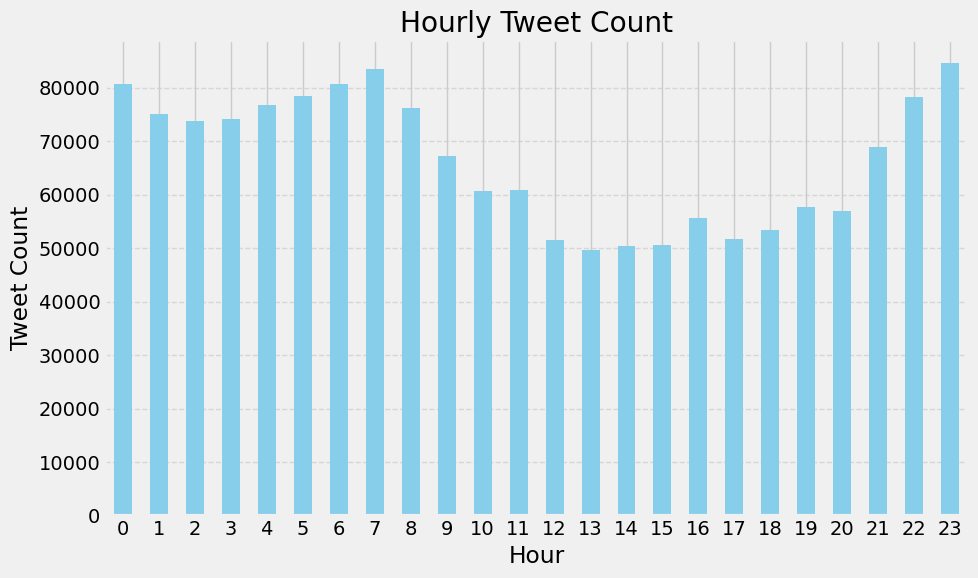

In [45]:
df['date'] = pd.to_datetime(df['date'].str.replace('PDT', '-07:00'), format='%a %b %d %H:%M:%S %z %Y')

hourly_tweets = df['date'].dt.hour.value_counts().sort_index()

# Visualize the hourly tweet count
plt.figure(figsize=(10, 6))
hourly_tweets.plot(kind='bar', color='skyblue')
plt.title('Hourly Tweet Count')
plt.xlabel('Hour')
plt.ylabel('Tweet Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Time Series Forecasting

In [46]:
# "full_date" and "sentiment_score"
df = df[["full_date", "sentiment_score"]]

In [47]:
df.head(5)

full_date  sentiment_score
0  Mon Apr 06 2009             84.0
1  Mon Apr 06 2009             68.0
2  Mon Apr 06 2009             37.0
3  Mon Apr 06 2009             81.0
4  Mon Apr 06 2009             23.0

In [48]:
df['date'] = pd.to_datetime(df['full_date'])

print(df)

               full_date  sentiment_score       date
0        Mon Apr 06 2009             84.0 2009-04-06
1        Mon Apr 06 2009             68.0 2009-04-06
2        Mon Apr 06 2009             37.0 2009-04-06
3        Mon Apr 06 2009             81.0 2009-04-06
4        Mon Apr 06 2009             23.0 2009-04-06
...                  ...              ...        ...
1599994  Tue Jun 16 2009             44.0 2009-06-16
1599995  Tue Jun 16 2009             55.0 2009-06-16
1599996  Tue Jun 16 2009             45.0 2009-06-16
1599997  Tue Jun 16 2009             50.0 2009-06-16
1599998  Tue Jun 16 2009             53.0 2009-06-16

[1598314 rows x 3 columns]


In [49]:
print(df.dtypes)

full_date                  object
sentiment_score           float64
date               datetime64[ns]
dtype: object


In [50]:
df['sentiment_score'] = pd.to_numeric(df['sentiment_score'])

In [51]:
print(df.dtypes)

full_date                  object
sentiment_score           float64
date               datetime64[ns]
dtype: object


array([[<Axes: title={'center': 'sentiment_score'}>,
        <Axes: title={'center': 'date'}>]], dtype=object)

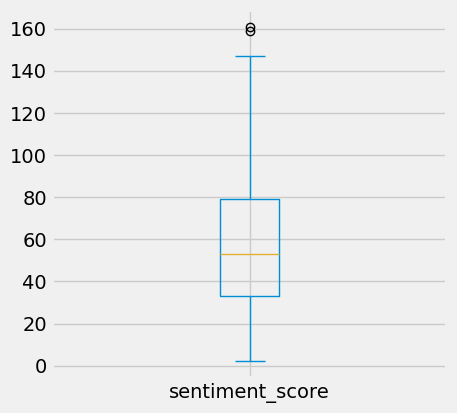

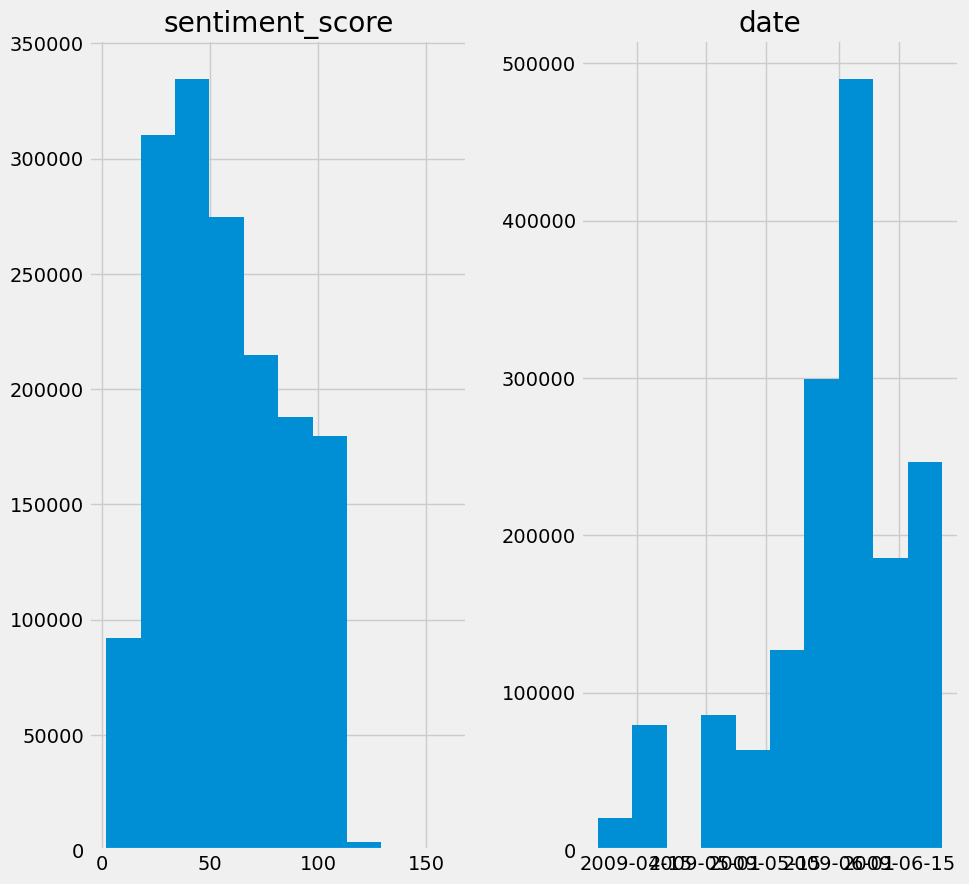

In [52]:
# Check the columns of the dataframe
df.columns

# Check the datatypes of the columns
df.dtypes

# Check the missing values
df.isnull().sum()

# Check the unique values of the columns
df.nunique()

# Check the value counts of the columns
df['sentiment_score'].value_counts()

# Check the percentage of the value counts of the columns
df['sentiment_score'].value_counts(normalize=True)

# Check the summary statistics of the dataframe
df.describe(include='all')

# Check the outliers
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

# Check the distribution of the columns
df.hist(figsize=(10,10))

In [53]:
df['date'] = pd.to_datetime(df['date'])

In [54]:
df[df['sentiment_score'].isnull()]  

Empty DataFrame
Columns: [full_date, sentiment_score, date]
Index: []

In [55]:
df = df.groupby('date').mean().reset_index()

In [56]:
# Check the dataframe
print(df.head(3))
print(df.tail(3))

        date  sentiment_score
0 2009-04-06        57.575604
1 2009-04-07        57.784950
2 2009-04-17        56.847551
         date  sentiment_score
45 2009-06-23        56.914187
46 2009-06-24        56.808700
47 2009-06-25        57.386615


In [57]:
# Find the missing dates in the dataframe and insert them, leaving the sentiment_score column as Null
idx = pd.date_range('2009-04-06', '2009-06-25')
df = df.set_index('date').reindex(idx).rename_axis('date').reset_index()

# Check the dataframe
print(df.head(3))

        date  sentiment_score
0 2009-04-06        57.575604
1 2009-04-07        57.784950
2 2009-04-08              NaN


        date  sentiment_score
0 2009-04-06        57.575604
1 2009-04-07        57.784950
2 2009-04-08              NaN
3 2009-04-09              NaN
4 2009-04-10              NaN
5 2009-04-11              NaN
6 2009-04-12              NaN
7 2009-04-13              NaN
8 2009-04-14              NaN
9 2009-04-15              NaN


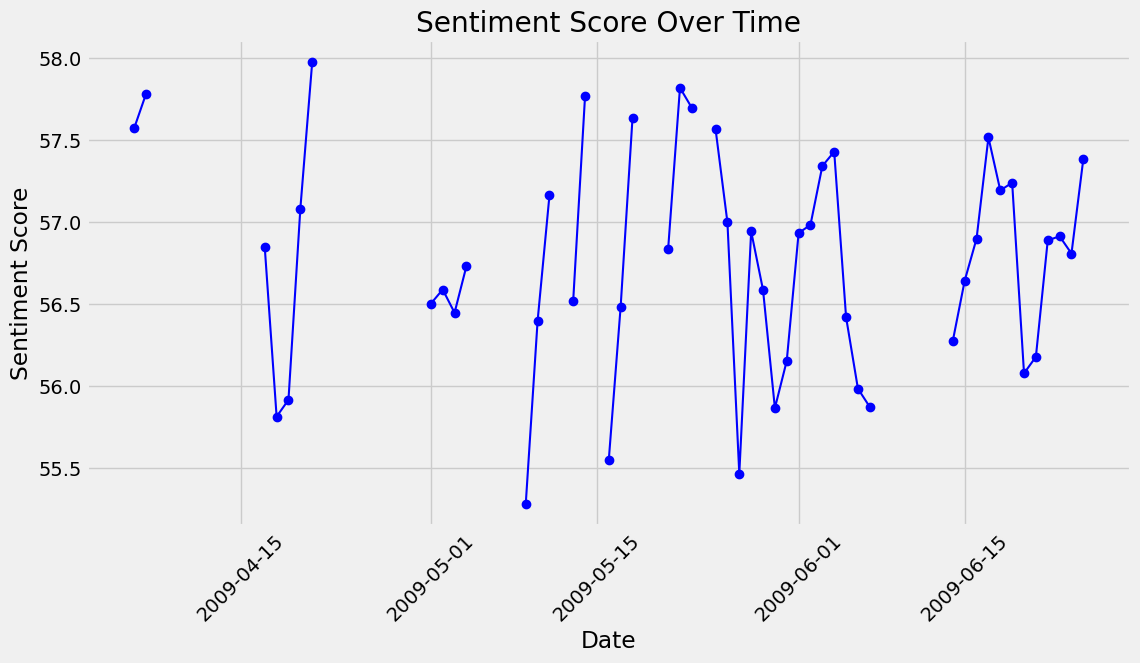

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Reindex the DataFrame to include all dates in the range and set sentiment_score to NaN for missing dates
df = df.set_index('date').reindex(idx).rename_axis('date').reset_index()

# Check the DataFrame
print(df.head(10))  # Print more rows to see the missing dates filled

# Plot the DataFrame
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sentiment_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [59]:
# Fill in the null values using interpolation
df['sentiment_score'] = df['sentiment_score'].interpolate(method='linear')

Shape: 
(81, 2)

Columns: 
Index(['date', 'sentiment_score'], dtype='object')

Data Types: 
date               datetime64[ns]
sentiment_score           float64
dtype: object

Missing Values: 
date               0
sentiment_score    0
dtype: int64

Unique Values: 
date               81
sentiment_score    81
dtype: int64

Value Counts: 
57.575604    1
56.485364    1
57.430632    1
57.343205    1
56.983998    1
            ..
56.589045    1
56.502595    1
56.650062    1
56.797530    1
57.386615    1
Name: sentiment_score, Length: 81, dtype: int64

Percentage of Value Counts: 
57.575604    0.012346
56.485364    0.012346
57.430632    0.012346
57.343205    0.012346
56.983998    0.012346
               ...   
56.589045    0.012346
56.502595    0.012346
56.650062    0.012346
56.797530    0.012346
57.386615    0.012346
Name: sentiment_score, Length: 81, dtype: float64

Summary Statistics: 


sentiment_score    Axes(0.08,0.511818;0.395455x0.368182)
dtype: object

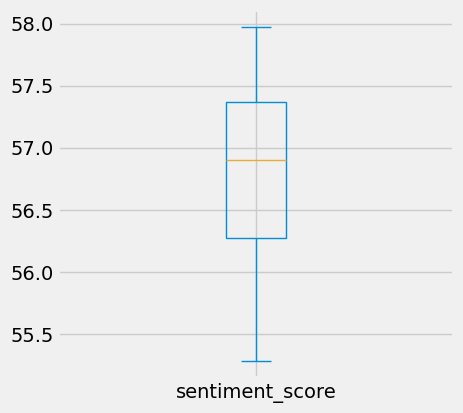

In [60]:
# Perform EDA on the new dataframe
print("Shape: ")
print(df.shape)
print("\n" + "Columns: ")
print(df.columns)
print("\n" + "Data Types: ")
print(df.dtypes)
print("\n" + "Missing Values: ")
print(df.isnull().sum())
print("\n" + "Unique Values: ")
print(df.nunique())
print("\n" + "Value Counts: ")
print(df['sentiment_score'].value_counts())
print("\n" + "Percentage of Value Counts: ")
print(df['sentiment_score'].value_counts(normalize=True))
print("\n" + "Summary Statistics: ")
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

In [61]:
# Describe the df
df.describe(include='all')

date  sentiment_score
count                    81        81.000000
unique                   81              NaN
top     2009-04-06 00:00:00              NaN
freq                      1              NaN
first   2009-04-06 00:00:00              NaN
last    2009-06-25 00:00:00              NaN
mean                    NaN        56.815873
std                     NaN         0.659395
min                     NaN        55.279662
25%                     NaN        56.276359
50%                     NaN        56.899812
75%                     NaN        57.369476
max                     NaN        57.977270

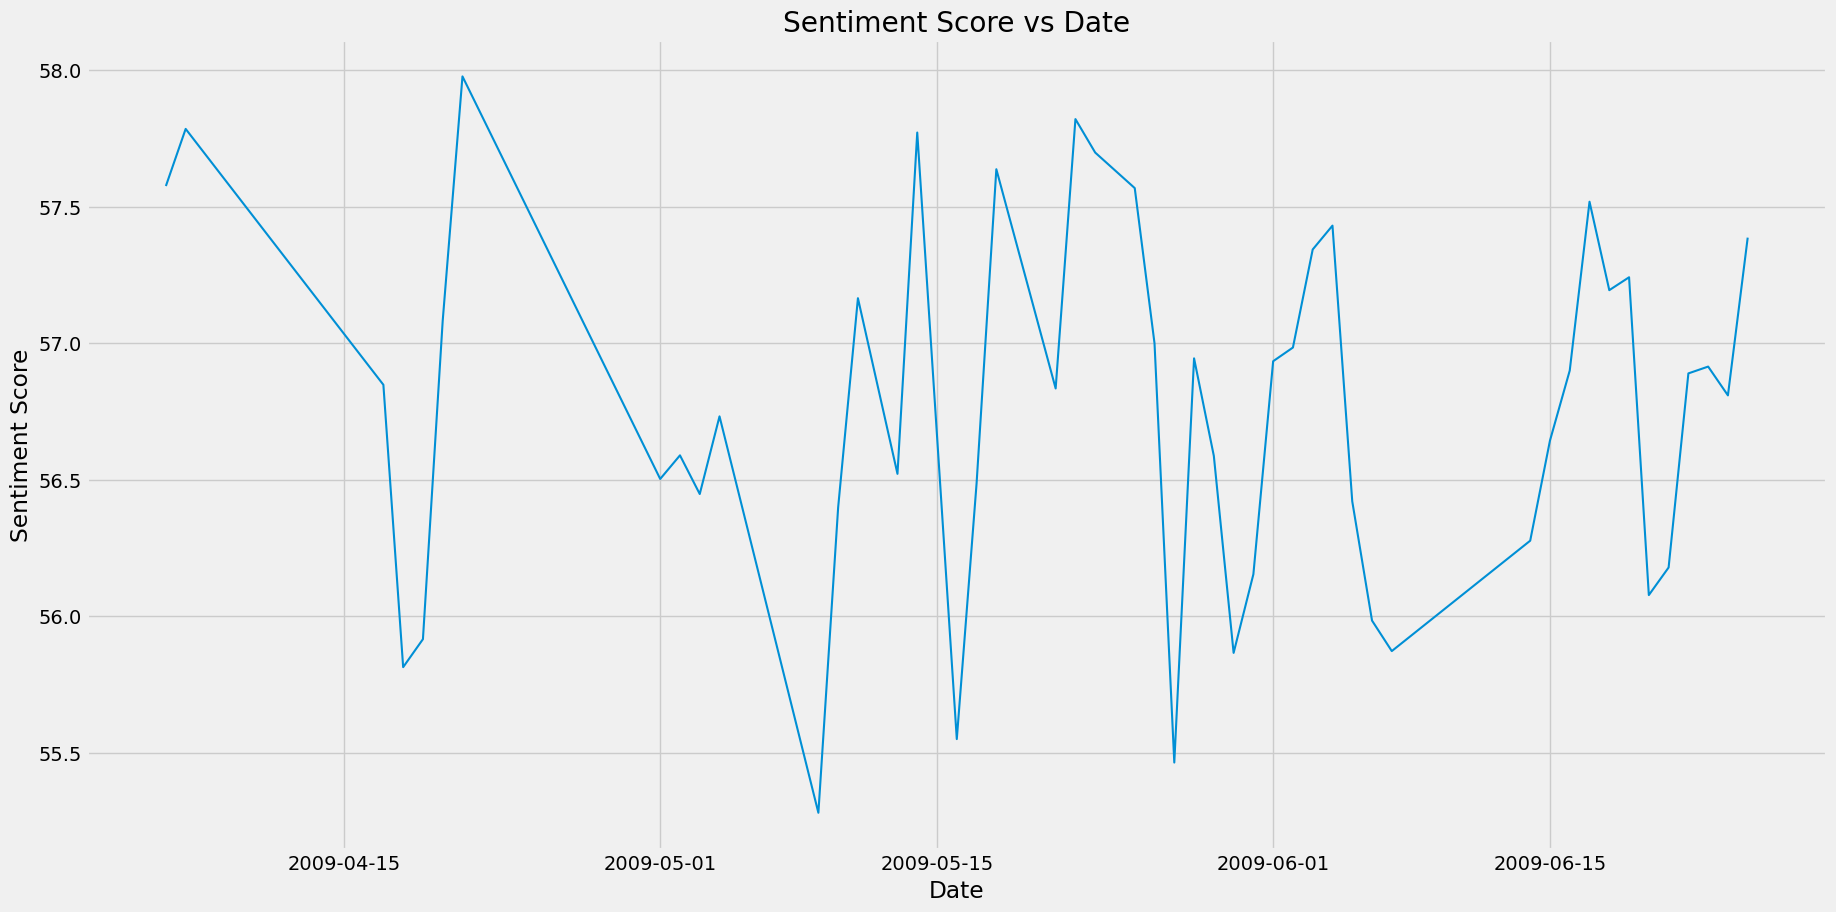

In [62]:
import matplotlib.pyplot as plt

# Plot the sentiment_score
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['sentiment_score'])
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score vs Date')
plt.show()


## Time Series Analysis

### Data Processing

In [63]:
# Create a function to check the stationarity of the time series
def check_stationarity(timeseries):
    
    # Calculate the rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    # Print whether the time series is stationary or not, based on the p-value
    if dfoutput[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

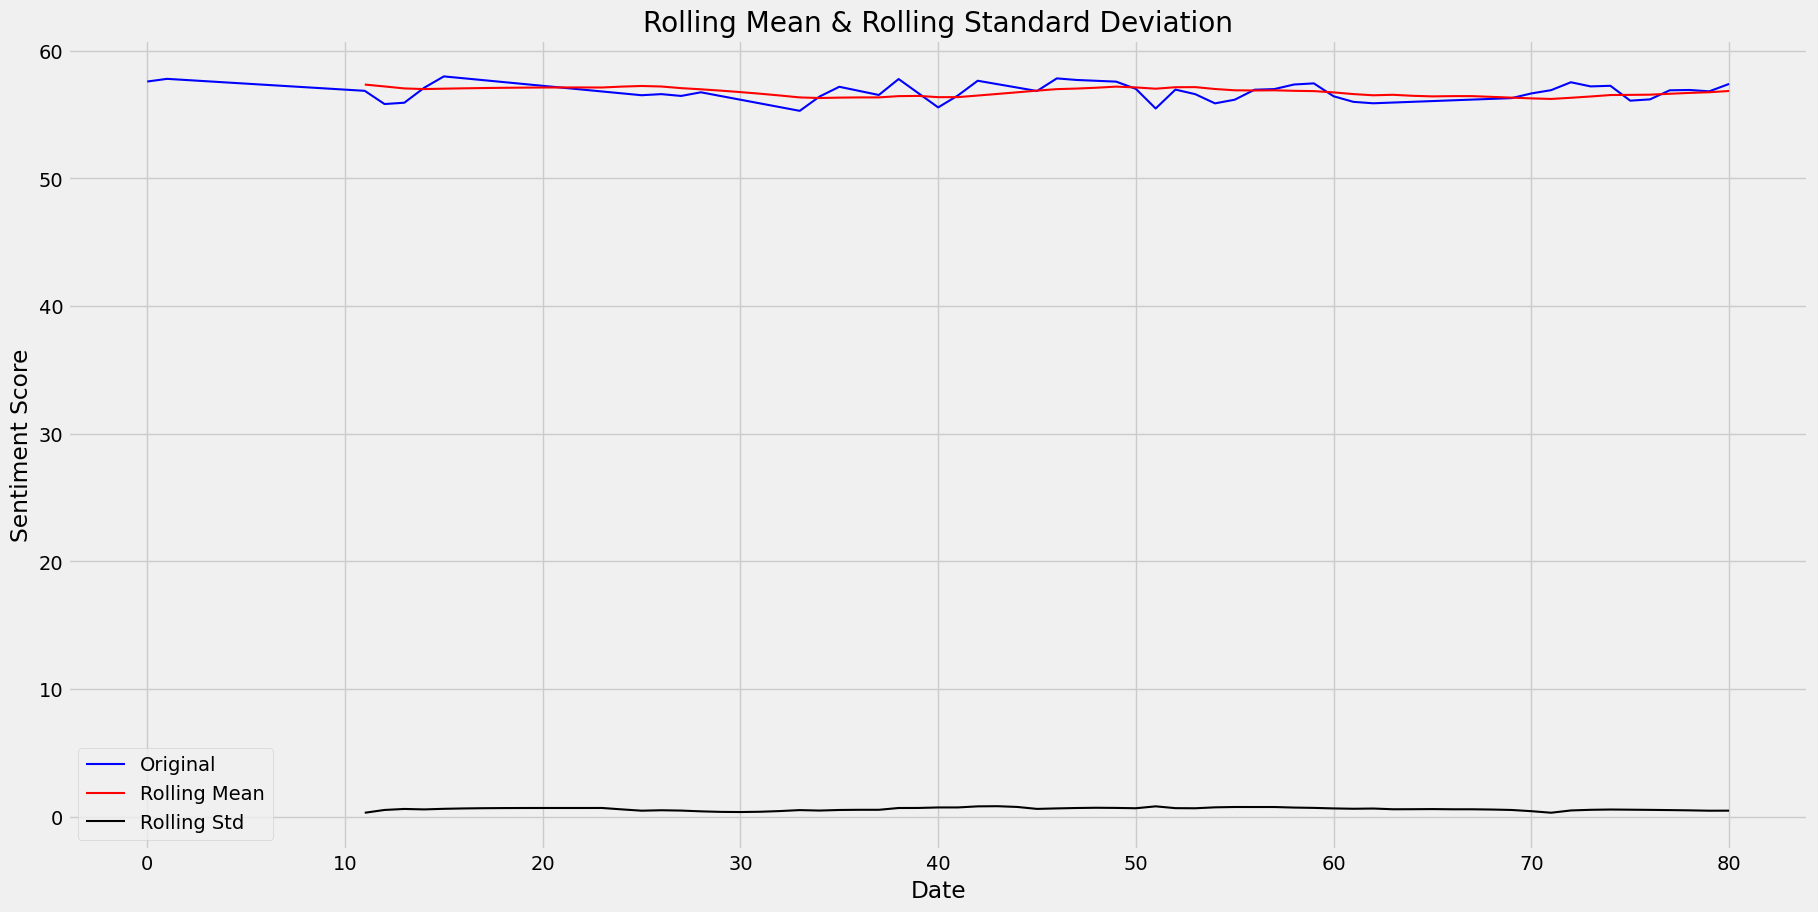

Results of Dickey-Fuller Test:
Test Statistic                 -2.891555
p-value                         0.046339
#Lags Used                      5.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64
The time series is stationary.


In [64]:
from statsmodels.tsa.stattools import adfuller

# Check the stationarity of the time series
check_stationarity(df['sentiment_score'])

According to the Dickey-Fuller unit root test results, we can conclude that your data set is stationary. This means that the time series exhibits statistically stable behavior and there is no particular trend or fluctuation over time. We can use these results in future modeling and forecasting studies to ensure that the stationarity assumption is met.

In [65]:
from statsmodels.tsa.stattools import kpss
# KPSS Test
def kpss_test(timeseries):
    print('KPSS Test:')
    result = kpss(timeseries, regression='c', nlags='auto')
    labels = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations']
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
    if result[1] <= 0.05:
        print("Result: The time series is non-stationary as the p-value is less than the significance level (0.05).")
    else:
        print("Result: The time series is stationary as the p-value is greater than the significance level (0.05).")

# Apply the test using the 'Precipitation_Amount' column
kpss_test(df['sentiment_score'])

KPSS Test:
Test Statistic: 0.337701523120429
p-value: 0.1
Lags Used: 4
Number of Observations: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Result: The time series is stationary as the p-value is greater than the significance level (0.05).


According to the KPSS test results, it can be said that the time series is stationary and does not contain any statistically significant change. This means that the time series remains constant around a certain mean and variance over time.

Since the time series is stationary, differentiating or any other method will not be used to make it stationary.

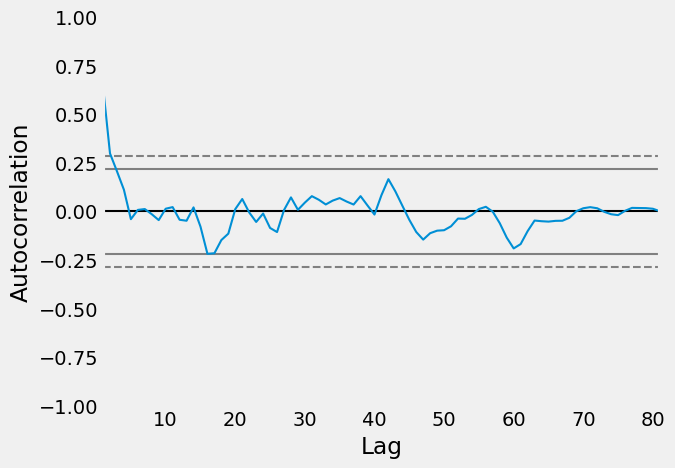

In [66]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['sentiment_score'])
plt.show() 

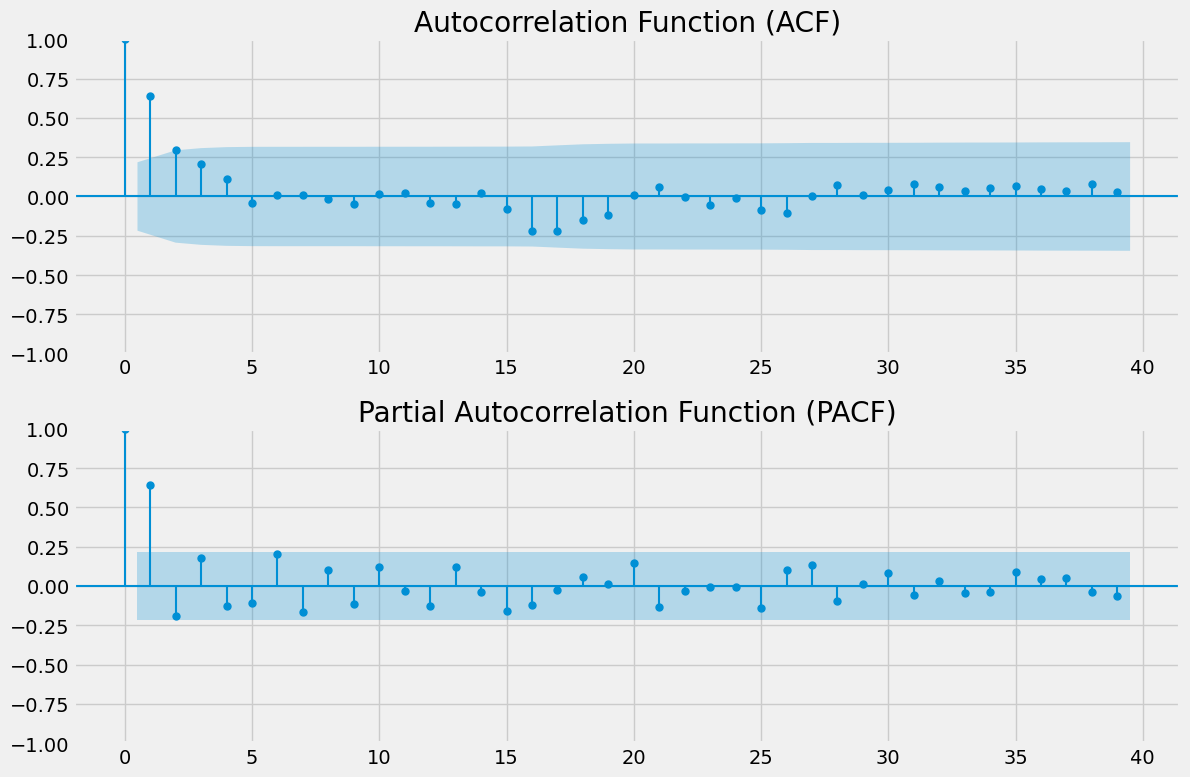

In [67]:
import statsmodels.api as sm
# Determine a valid number of lags (less than 50% of the sample size)
max_lags = len(df) // 2 - 1
if max_lags > 40:
    max_lags = 40  # Use 40 if it's less than the computed max_lags

# Plot the ACF and PACF
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df['sentiment_score'], lags=max_lags, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df['sentiment_score'], lags=max_lags, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [68]:
# Decompose the time series
# Decomposition is a useful technique to remove the trend and seasonality from a time series, since the timespan is 2.5 months (75 days), the period is 7 days
decomposition = seasonal_decompose(df['sentiment_score'], period=7)

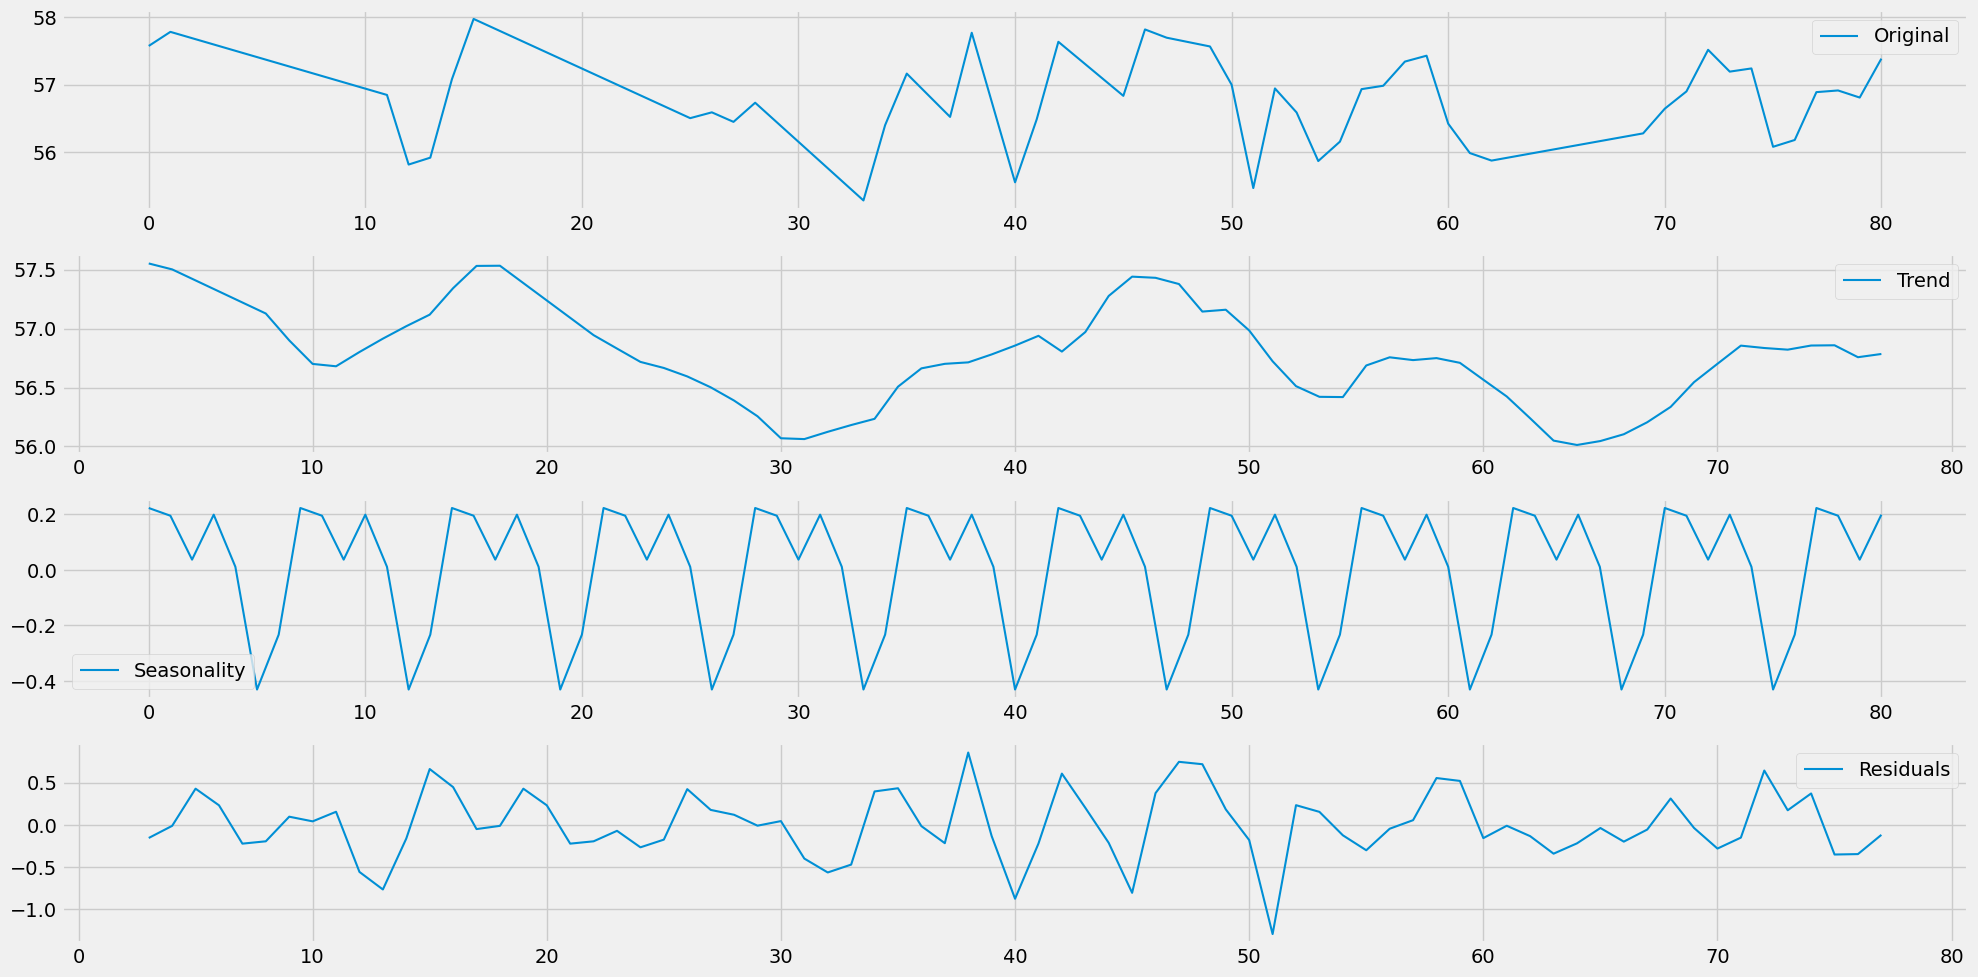

In [69]:
# Plot the original time series, the trend, the seasonality, and the residuals
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df['sentiment_score'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [70]:
# Use the decomposed time series to make the time series stationary
df['sentiment_score_decomposed'] = decomposition.resid

In [71]:
# Fill any null values with the mean of the column
df['sentiment_score_decomposed'] = df['sentiment_score_decomposed'].fillna(df['sentiment_score_decomposed'].mean())

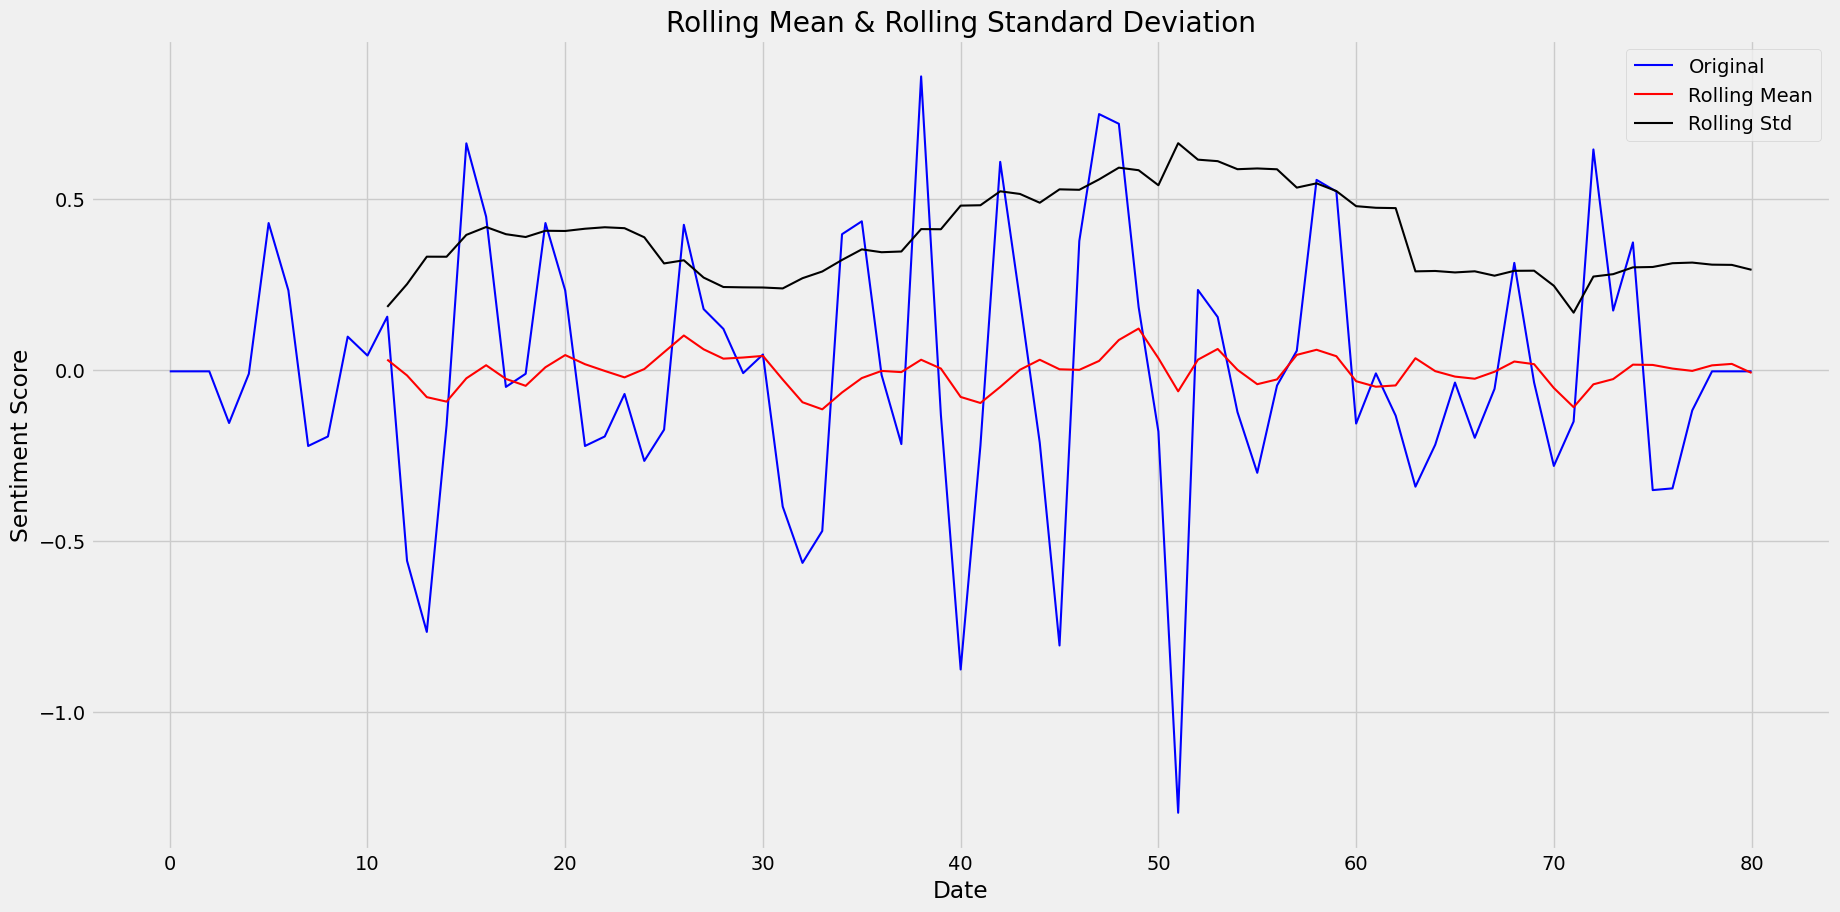

Results of Dickey-Fuller Test:
Test Statistic                -5.900330e+00
p-value                        2.787851e-07
#Lags Used                     8.000000e+00
Number of Observations Used    7.200000e+01
Critical Value (1%)           -3.524624e+00
Critical Value (5%)           -2.902607e+00
Critical Value (10%)          -2.588679e+00
dtype: float64
The time series is stationary.


In [72]:
# Out of the stationary time series columns which one is the most stationary
check_stationarity(df['sentiment_score_decomposed'])

In [73]:
# Create a fuction to plot the ACF and PACF plots
def plot_acf_pacf(timeseries):
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(acf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(212)
    plt.plot(pacf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    plt.show()

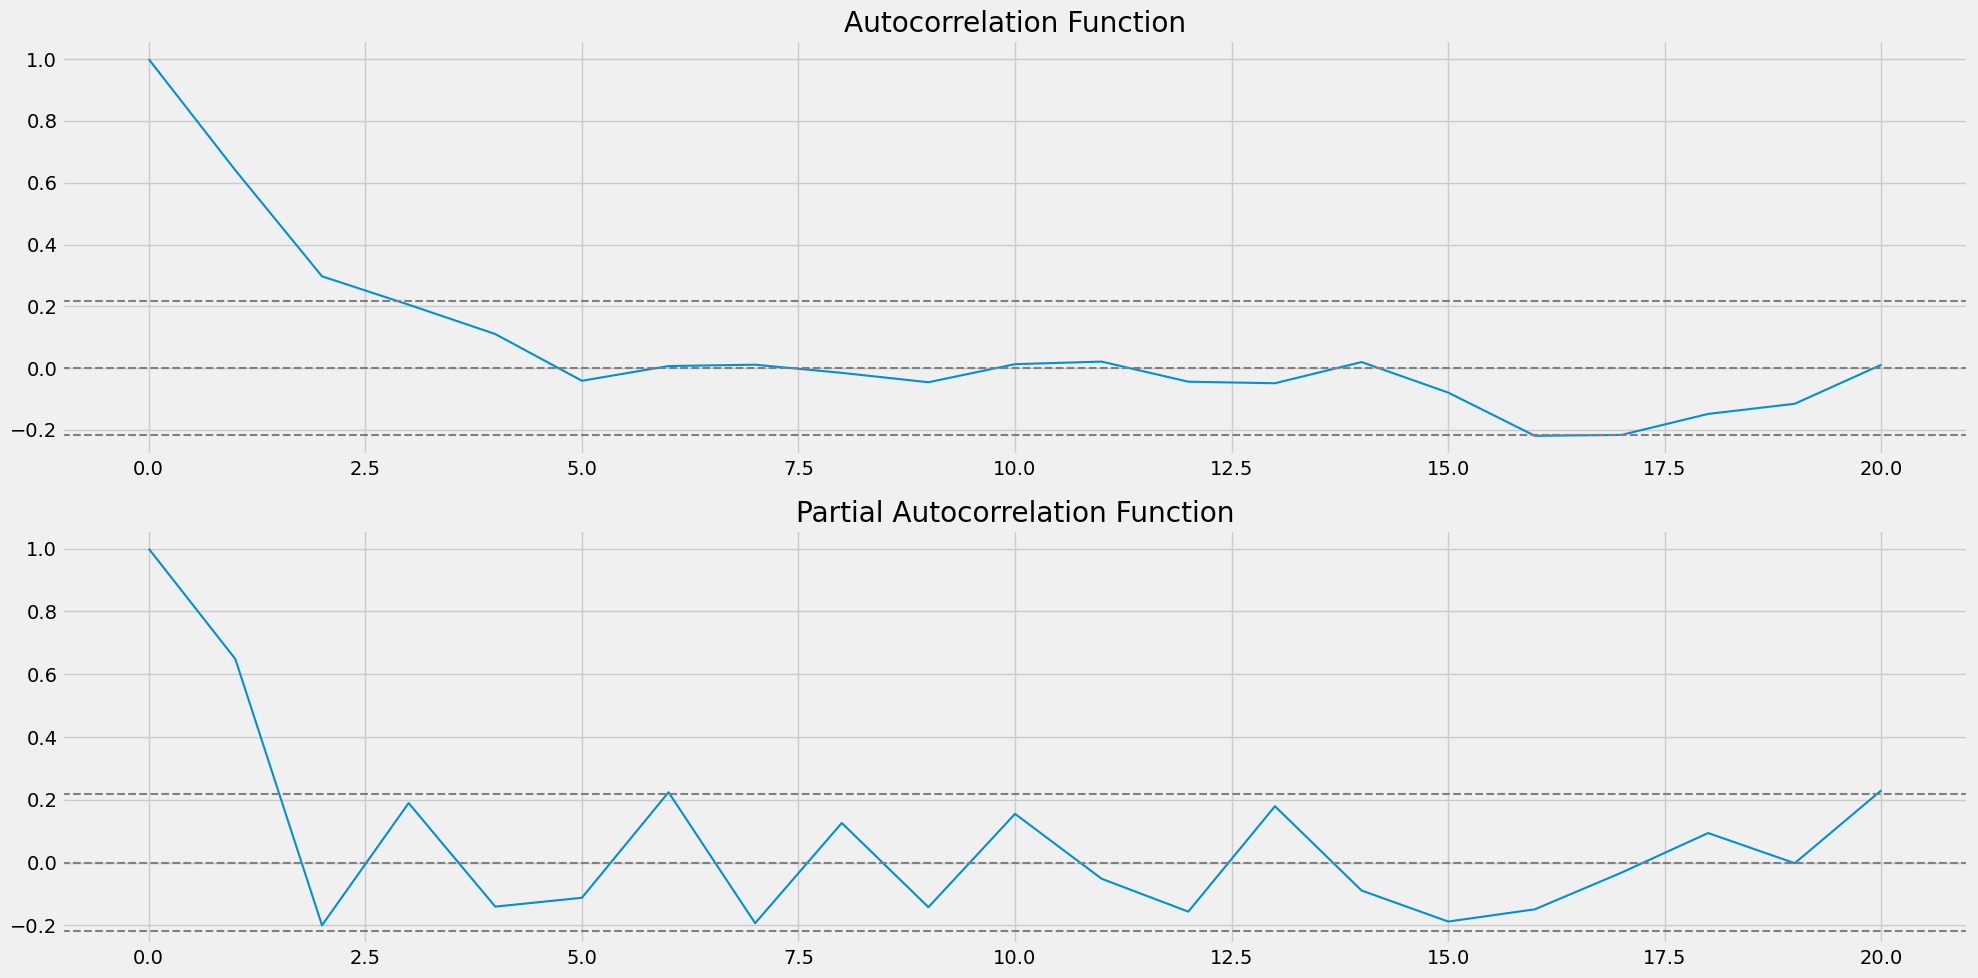

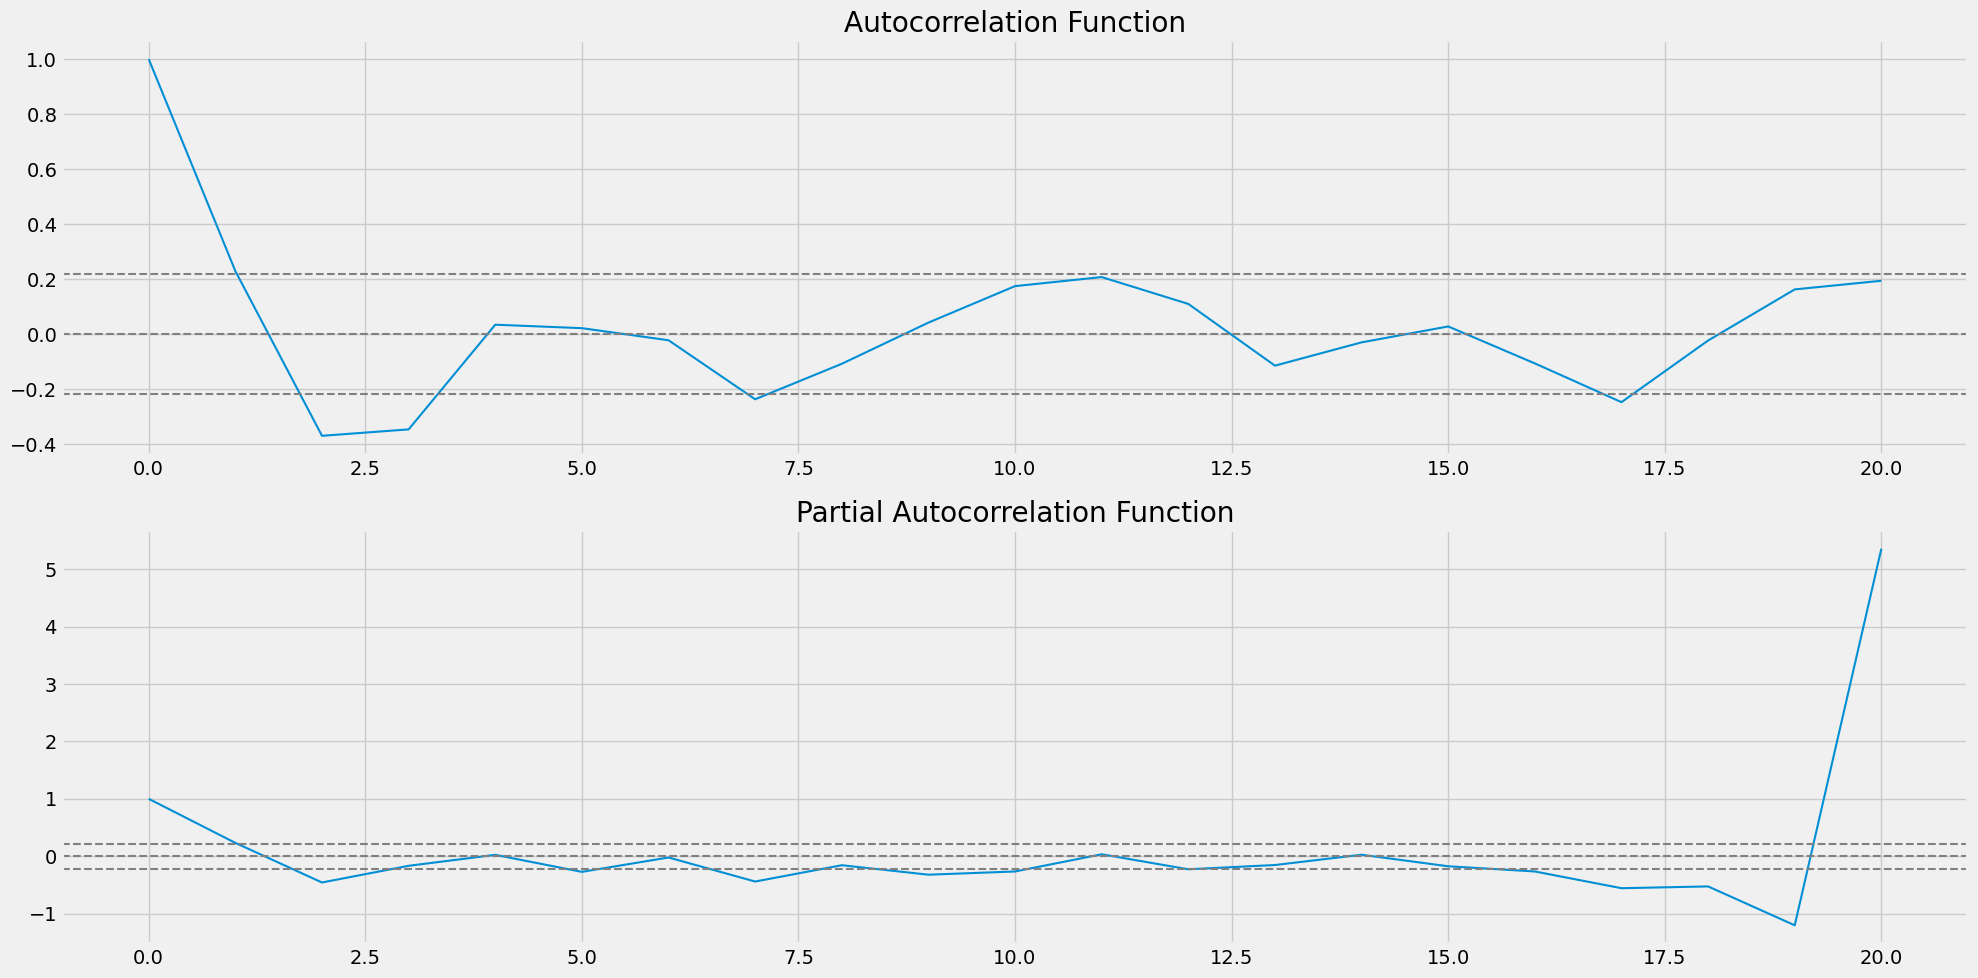

In [74]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf

# Plot the ACF and PACF plots for the 2 stationary time series columns
plot_acf_pacf(df['sentiment_score'])
plot_acf_pacf(df['sentiment_score_decomposed'])

In [75]:
# Print the p-values of the 2 stationary time series columns
print(adfuller(df['sentiment_score'])[1])
print(adfuller(df['sentiment_score_decomposed'])[1])

0.04633885677173584
2.787850674675886e-07


## ARIMA MODEL

In [76]:
# We are going to use the sentiment_score_decomposed column for the ARIMA model
df1 = df[['date', 'sentiment_score_decomposed']]

# Set the full_date column as the index
df1.set_index('date', inplace=True)

sentiment_score_decomposed    0
dtype: int64

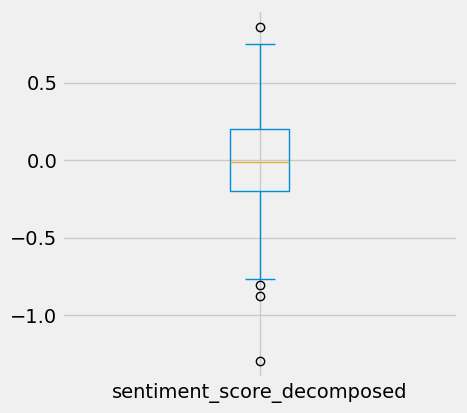

In [77]:
# Check the dataframe for outliers and missing values
df1.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))
df1.isnull().sum()

In [78]:
# Normalise the dataframe
scaler = MinMaxScaler()
df1['sentiment_score_decomposed'] = scaler.fit_transform(df1['sentiment_score_decomposed'].values.reshape(-1,1))

In [79]:
# Check the dataframe
print(len(df1))
print(round(len(df1)*.8))
print(len(df1) - round(len(df1)*.8))

81
65
16


In [80]:
df1.describe(include='all')

sentiment_score_decomposed
count                   81.000000
mean                     0.599473
std                      0.175379
min                      0.000000
25%                      0.509218
50%                      0.596162
75%                      0.695773
max                      1.000000

(65, 1)
(16, 1)
Train dates : 2009-04-06 00:00:00 --- 2009-06-09 00:00:00  (n=65)
Test dates  : 2009-06-10 00:00:00 --- 2009-06-25 00:00:00  (n=16)


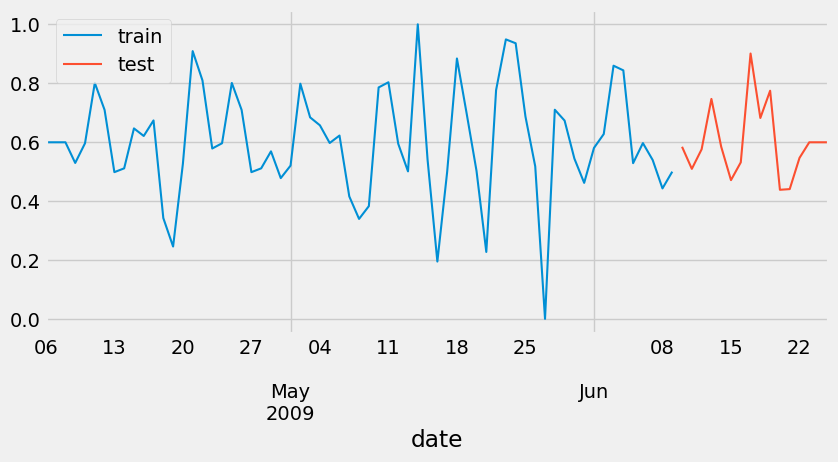

In [81]:
# Split data into train-test
# ==============================================================================
steps = 16
train = df1[:-steps]
test  = df1[-steps:]

print(train.shape)
print(test.shape)

print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

fig, ax=plt.subplots(figsize=(9, 4))
train['sentiment_score_decomposed'].plot(ax=ax, label='train')
test['sentiment_score_decomposed'].plot(ax=ax, label='test')
ax.legend()

In [82]:
model = ARIMA(train, order=(1,1,1), freq='D')
model_fit = model.fit()
print(model_fit.summary())

                                   SARIMAX Results                                    
Dep. Variable:     sentiment_score_decomposed   No. Observations:                   65
Model:                         ARIMA(1, 1, 1)   Log Likelihood                  16.697
Date:                        Thu, 16 May 2024   AIC                            -27.394
Time:                                05:05:10   BIC                            -20.917
Sample:                            04-06-2009   HQIC                           -24.842
                                 - 06-09-2009                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2546      0.158      1.609      0.108      -0.055       0.565
ma.L1         -0.9990      6.341     -0.158      0.875     -13.427 

In [83]:
# Tune the ARIMA model
# Create a function to find the best ARIMA model
def find_best_arima_model(train, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order, aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return best_cfg

In [84]:
# Find the best ARIMA model
p_values = [0,1,2,4,6,8,10]
d_values = range(0,3)
q_values = range(0,3)
find_best_arima_model(train, p_values, d_values, q_values)

ARIMA(0, 0, 0) AIC=-30.852
ARIMA(0, 0, 1) AIC=-37.742
ARIMA(0, 0, 2) AIC=-44.855
ARIMA(0, 1, 0) AIC=-4.551
ARIMA(0, 1, 1) AIC=-25.149
ARIMA(0, 1, 2) AIC=-32.594
ARIMA(0, 2, 0) AIC=45.645
ARIMA(0, 2, 1) AIC=2.699
ARIMA(0, 2, 2) AIC=-12.736
ARIMA(1, 0, 0) AIC=-32.604
ARIMA(1, 0, 1) AIC=-35.933
ARIMA(1, 0, 2) AIC=-51.760
ARIMA(1, 1, 0) AIC=-3.071
ARIMA(1, 1, 1) AIC=-27.394
ARIMA(1, 1, 2) AIC=-30.701
ARIMA(1, 2, 0) AIC=40.064
ARIMA(1, 2, 1) AIC=4.344
ARIMA(1, 2, 2) AIC=5.674
ARIMA(2, 0, 0) AIC=-46.648
ARIMA(2, 0, 1) AIC=-56.022
ARIMA(2, 0, 2) AIC=-55.628
ARIMA(2, 1, 0) AIC=-15.302
ARIMA(2, 1, 1) AIC=-40.437
ARIMA(2, 1, 2) AIC=-45.049
ARIMA(2, 2, 0) AIC=29.901
ARIMA(2, 2, 1) AIC=-6.950
ARIMA(2, 2, 2) AIC=-27.581
ARIMA(4, 0, 0) AIC=-43.785
ARIMA(4, 0, 1) AIC=-46.034
ARIMA(4, 0, 2) AIC=-54.405
ARIMA(4, 1, 0) AIC=-22.970
ARIMA(4, 1, 1) AIC=-37.351
ARIMA(4, 1, 2) AIC=-39.745
ARIMA(4, 2, 0) AIC=9.162
ARIMA(4, 2, 1) AIC=-13.618
ARIMA(4, 2, 2) AIC=-13.967
ARIMA(6, 0, 0) AIC=-44.583
ARIMA(6, 0, 1) 

(10, 0, 0)

In [85]:
# Create the ARIMA model using the best parameters
model = ARIMA(train, freq='D', order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

                                   SARIMAX Results                                    
Dep. Variable:     sentiment_score_decomposed   No. Observations:                   65
Model:                         ARIMA(2, 0, 2)   Log Likelihood                  33.814
Date:                        Thu, 16 May 2024   AIC                            -55.628
Time:                                05:05:31   BIC                            -42.582
Sample:                            04-06-2009   HQIC                           -50.480
                                 - 06-09-2009                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6013      0.003    209.923      0.000       0.596       0.607
ar.L1          0.7620      0.205      3.724      0.000       0.361 

In [86]:
# Tune the ARIMA model
# Create a function to find the best ARIMA model
def find_best_arima_model(train, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order, aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return best_cfg

In [87]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        model = sm.tsa.ARIMA(df1['sentiment_score_decomposed'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print("Best ARIMA{} AIC={}".format(best_pdq, best_aic))

Best ARIMA(2, 0, 1) AIC=-80.82578851096017


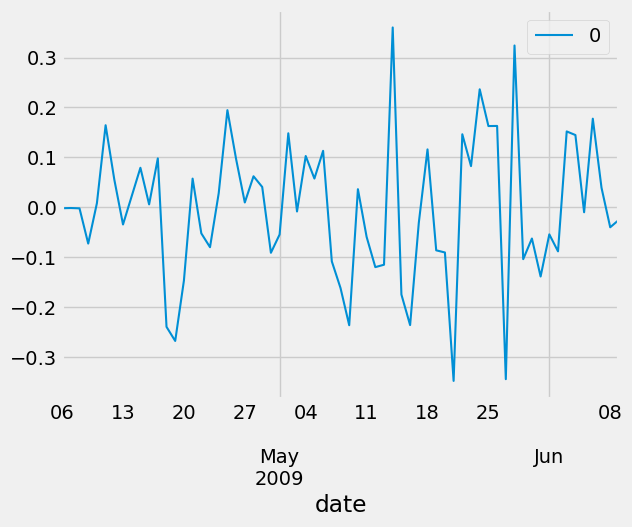

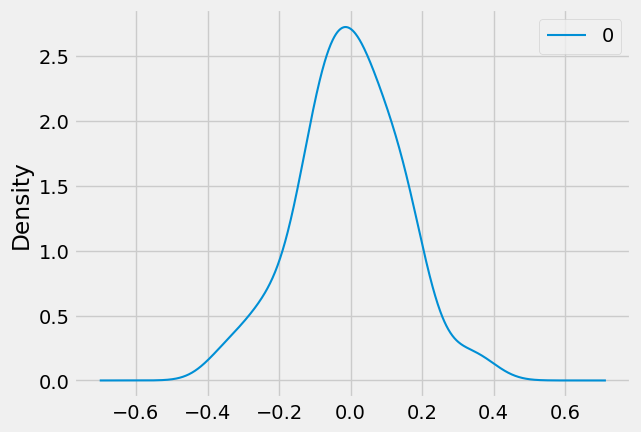

               0
count  65.000000
mean   -0.003057
std     0.142858
min    -0.347644
25%    -0.088201
50%    -0.001839
75%     0.096512
max     0.360179


In [88]:
# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [89]:
# Generate predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [90]:
# Create a function to plot the predictions
def plot_predictions(predictions, test):
    plt.figure(figsize=(20,10))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.title('Actual vs Predicted Sentiment Score')
    plt.legend()
    plt.show()
    
# Create a function to calculate the RMSE and R2 score
def calculate_metrics(test, predictions):
    rmse = np.sqrt(mean_squared_error(test, predictions))
    r2 = r2_score(test, predictions)
    print('The RMSE is', rmse)
    print('The R2 score is', r2)

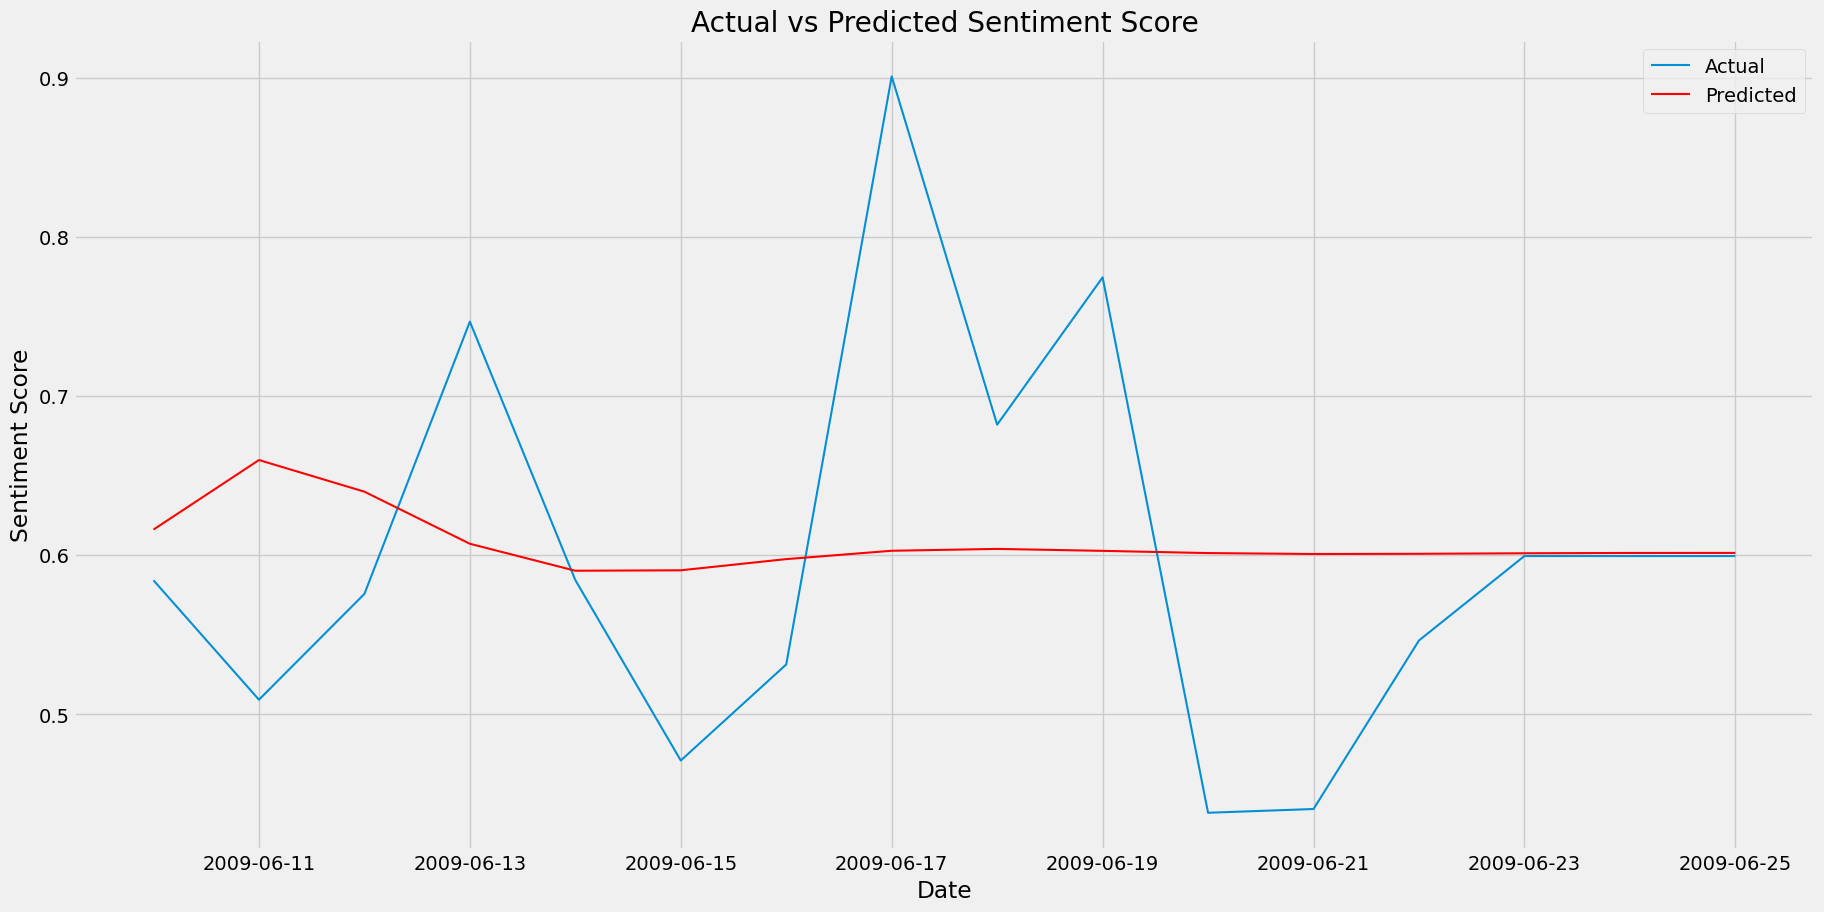

The RMSE is 0.1239141122207497
The R2 score is -49.73498959558958


In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Plot the predictions against the actual values
plot_predictions(predictions, test)

# Calculate the RMSE, MAPE, MAE, and R2 score
calculate_metrics(predictions, test)

In [92]:
# Generate predictions for the entire dataset
predictions_full = model_fit.predict(start=0, end=len(df1) - 1)

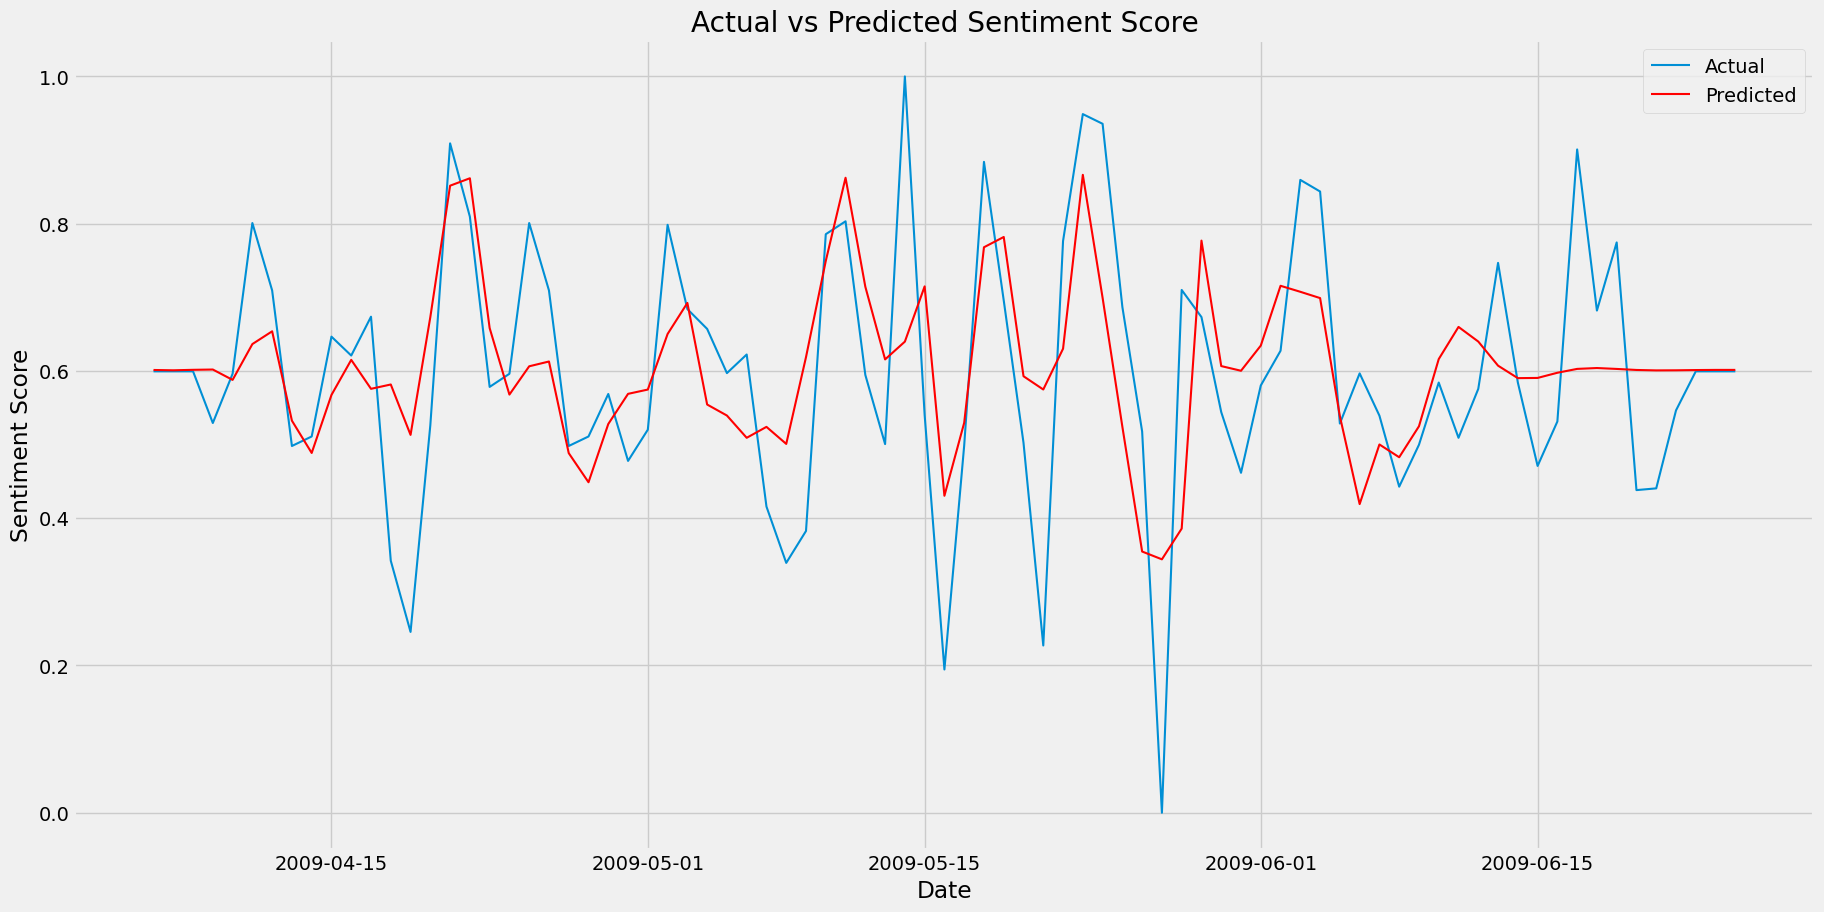

In [93]:
# Plot the entire time series with the predictions
plot_predictions(predictions_full, df1)

In [94]:
# Predict the sentiment score for the next 1 days
next_day_prediction = model_fit.predict(start=len(df1), end=len(df1))
next_day_prediction = scaler.inverse_transform(next_day_prediction.values.reshape(-1,1))
next_day_prediction = pd.DataFrame(next_day_prediction, columns=['sentiment_score_decomposed'])
next_day_prediction['date'] = pd.date_range(start=df1.index.max() + pd.Timedelta(days=1), end=df1.index.max() + pd.Timedelta(days=1))
next_day_prediction.set_index('date', inplace=True)
print("Next Day Prediction:")
print(next_day_prediction)

Next Day Prediction:
            sentiment_score_decomposed
date                                  
2009-06-26                    0.000193


In [95]:
# Predict the sentiment score for the next 3 days
three_days_prediction = model_fit.predict(start=len(df1), end=len(df1) + 2)
three_days_prediction = scaler.inverse_transform(three_days_prediction.values.reshape(-1,1))
three_days_prediction = pd.DataFrame(three_days_prediction, columns=['sentiment_score_decomposed'])
three_days_prediction['date'] = pd.date_range(start=df1.index.max() + pd.Timedelta(days=1), end=df1.index.max() + pd.Timedelta(days=3))
three_days_prediction.set_index('date', inplace=True)
print("\nThree Days Prediction:")
print(three_days_prediction)


Three Days Prediction:
            sentiment_score_decomposed
date                                  
2009-06-26                    0.000193
2009-06-27                    0.000069
2009-06-28                    0.000031


In [96]:
# Predict the sentiment score for the next 7 days
predictions_next_week = model_fit.predict(start=len(df1), end=len(df1) + 6)
predictions_next_week = scaler.inverse_transform(predictions_next_week.values.reshape(-1,1))
predictions_next_week = pd.DataFrame(predictions_next_week, columns=['sentiment_score_decomposed'])
predictions_next_week['date'] = pd.date_range(start=df1.index.max() + pd.Timedelta(days=1), end=df1.index.max() + pd.Timedelta(days=7))
predictions_next_week.set_index('date', inplace=True)
predictions_next_week

sentiment_score_decomposed
date                                  
2009-06-26                    0.000193
2009-06-27                    0.000069
2009-06-28                    0.000031
2009-06-29                    0.000052
2009-06-30                    0.000083
2009-07-01                    0.000099
2009-07-02                    0.000098

In [97]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

predictions = [next_day_prediction, three_days_prediction, predictions_next_week]
prediction_labels = ['1 Day Prediction', '3 Days Prediction', '7 Days Prediction']
actual_values = df['sentiment_score'][-1:].append(df['sentiment_score'].tail(3))

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.05,
                    subplot_titles=('1 Day Prediction', '3 Days Prediction', '7 Days Prediction'))

for i, prediction in enumerate(predictions):
    fig.add_trace(go.Scatter(x=prediction.index, y=prediction['sentiment_score_decomposed'], mode='lines', name='Predicted'), row=i+1, col=1)
    fig.add_trace(go.Scatter(x=actual_values.index, y=actual_values.values, mode='lines', name='Actual'), row=i+1, col=1)

    fig.update_yaxes(title_text='Sentiment Score', row=i+1, col=1)

fig.update_layout(height=800, title_text="Sentiment Score Predictions for Different Time Horizons")
fig.show()


In [98]:
df2 = df[['date', 'sentiment_score_decomposed']]

In [99]:
# move the full_date column to the index and set the frequency to daily
df2.set_index('date', inplace=True)
df2.index.freq = 'D'

In [100]:
# Verify that a temporary index is complete
# ==============================================================================
(df2.index == pd.date_range(start=df2.index.min(),
                             end=df2.index.max(),
                             freq=df2.index.freq)).all()

True

Train dates : 2009-04-06 00:00:00 --- 2009-06-09 00:00:00  (n=65)
Test dates  : 2009-06-10 00:00:00 --- 2009-06-25 00:00:00  (n=16)


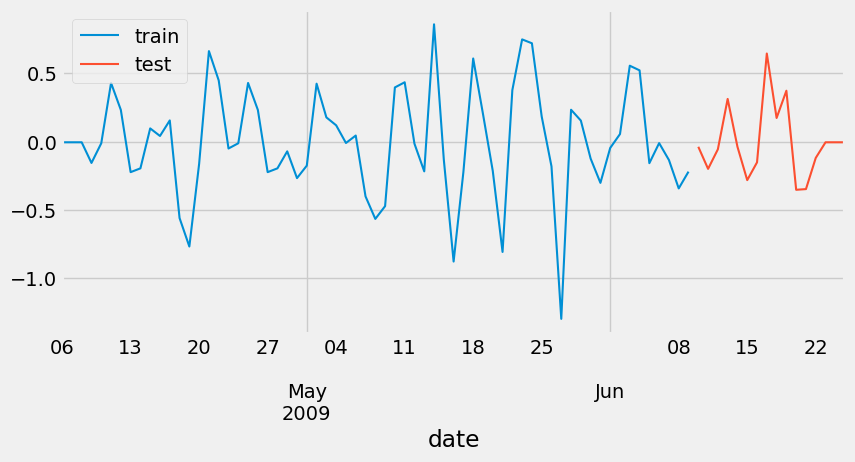

In [101]:
# Split data into train-test
# ==============================================================================
steps = 16
data_train = df2[:-steps]
data_test  = df2[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['sentiment_score_decomposed'].plot(ax=ax, label='train')
data_test['sentiment_score_decomposed'].plot(ax=ax, label='test')
ax.legend()

## LSTM MODEL

In [102]:
#pip install pandas numpy scikit-learn keras

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [104]:
df.head(5)

date  sentiment_score  sentiment_score_decomposed
0 2009-04-06        57.575604                   -0.003877
1 2009-04-07        57.784950                   -0.003877
2 2009-04-08        57.691210                   -0.003877
3 2009-04-09        57.597470                   -0.155127
4 2009-04-10        57.503730                   -0.011013

In [105]:
df.describe()

sentiment_score  sentiment_score_decomposed
count        81.000000                   81.000000
mean         56.815873                   -0.003877
std           0.659395                    0.378034
min          55.279662                   -1.296057
25%          56.276359                   -0.198425
50%          56.899812                   -0.011013
75%          57.369476                    0.203701
max          57.977270                    0.859470

In [106]:
X = df['sentiment_score'].values.reshape(-1, 1)
y = df['sentiment_score_decomposed'].values

In [107]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [109]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, 1)))
model.add(Dense(units=1))

In [110]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [111]:
model.fit(X_train.reshape(-1, 1, 1), y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
64/64 - 2s - loss: 0.1488 - 2s/epoch - 29ms/step
Epoch 2/100
64/64 - 0s - loss: 0.1435 - 110ms/epoch - 2ms/step
Epoch 3/100
64/64 - 0s - loss: 0.1383 - 135ms/epoch - 2ms/step
Epoch 4/100
64/64 - 0s - loss: 0.1348 - 159ms/epoch - 2ms/step
Epoch 5/100
64/64 - 0s - loss: 0.1311 - 158ms/epoch - 2ms/step
Epoch 6/100
64/64 - 0s - loss: 0.1267 - 147ms/epoch - 2ms/step
Epoch 7/100
64/64 - 0s - loss: 0.1236 - 150ms/epoch - 2ms/step
Epoch 8/100
64/64 - 0s - loss: 0.1193 - 162ms/epoch - 3ms/step
Epoch 9/100
64/64 - 0s - loss: 0.1168 - 150ms/epoch - 2ms/step
Epoch 10/100
64/64 - 0s - loss: 0.1125 - 142ms/epoch - 2ms/step
Epoch 11/100
64/64 - 0s - loss: 0.1097 - 150ms/epoch - 2ms/step
Epoch 12/100
64/64 - 0s - loss: 0.1068 - 142ms/epoch - 2ms/step
Epoch 13/100
64/64 - 0s - loss: 0.1031 - 173ms/epoch - 3ms/step
Epoch 14/100
64/64 - 0s - loss: 0.1007 - 139ms/epoch - 2ms/step
Epoch 15/100
64/64 - 0s - loss: 0.0980 - 141ms/epoch - 2ms/step
Epoch 16/100
64/64 - 0s - loss: 0.0948 - 156ms/epoc

In [112]:
score = model.evaluate(X_test.reshape(-1, 1, 1), y_test, verbose=0)
print("Test Loss:", score)

Test Loss: 0.10450229048728943


In [113]:
# Splitting the dataset into features (X) and target variable (y)
X = df['sentiment_score'].values.reshape(-1, 1)  # Features: 'sentiment_score' column
y = df['sentiment_score_decomposed'].values  # Target variable: 'sentiment_score_decomposed' column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).reshape(-1)

# Creating the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32)

# Making predictions with the model
def make_predictions(model, X, scaler):
    predictions = []
    for i in range(len(X)):
        prediction = model.predict(X[i].reshape(1, X[i].shape[0], 1))
        prediction = scaler.inverse_transform(prediction.reshape(-1, 1)).reshape(-1)[0]
        predictions.append(prediction)
    return predictions

Epoch 1/100
2/2 [==============================] - 2s 7ms/step - loss: 0.4067
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3996
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 0.3927
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.3860
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3795
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3732
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3666
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.3604
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.3542
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.3482
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 0.3420
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 0.3360
Epoch 13/100
2/2 [==============================] - 0s 7ms/st

1/1 [==============================] - 0s 36ms/step
1-day prediction: [0.109783106]
3-day prediction: [-0.26566902]
7-day prediction: [0.26540455]


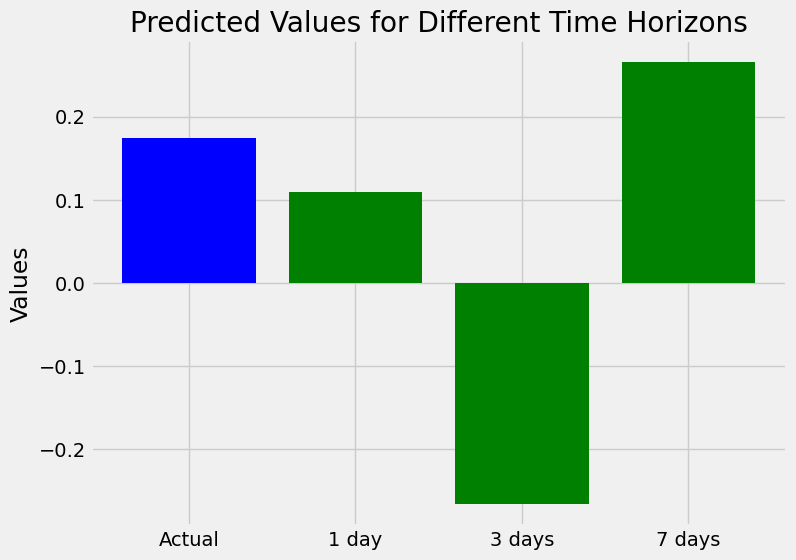

In [114]:
# Predicting the next 1, 3, and 7 days
X_to_predict = np.array([X_test_scaled[-1]])
predictions_1_day = make_predictions(model, X_to_predict, scaler_y)
X_to_predict = np.array([X_test_scaled[-3]])
predictions_3_days = make_predictions(model, X_to_predict, scaler_y)
X_to_predict = np.array([X_test_scaled[-7]])
predictions_7_days = make_predictions(model, X_to_predict, scaler_y)

print("1-day prediction:", predictions_1_day)
print("3-day prediction:", predictions_3_days)
print("7-day prediction:", predictions_7_days)

# Visualizing the predictions
all_values = [y_test[-1], predictions_1_day[0], predictions_3_days[0], predictions_7_days[0]]
x_positions = np.arange(len(all_values))

plt.figure(figsize=(8, 6))
plt.bar(x_positions, all_values, color=['blue', 'green', 'green', 'green'])
plt.xticks(x_positions, ['Actual', '1 day', '3 days', '7 days'])
plt.ylabel('Values')
plt.title('Predicted Values for Different Time Horizons')
plt.show()

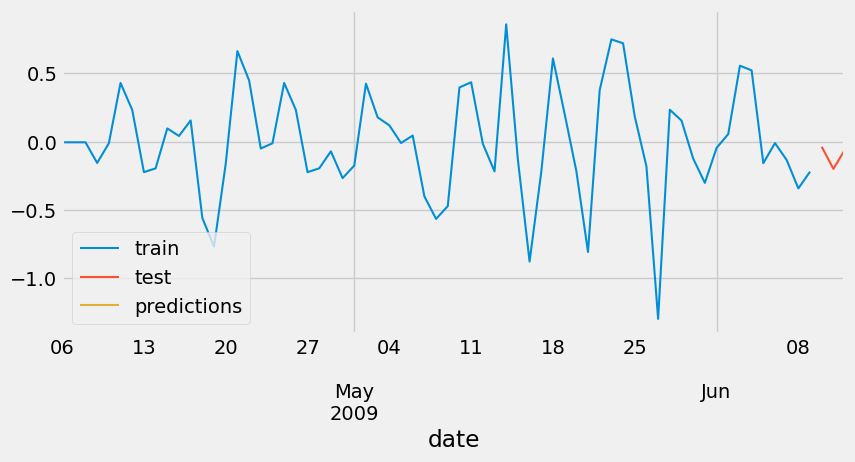

In [115]:
data_test_truncated = data_test.iloc[:len(predictions)]

# Ensure predictions contain only numeric data
predictions_series = pd.Series(predictions, index=data_test_truncated.index)

# Convert predictions_series to numeric
predictions_series = pd.to_numeric(predictions_series, errors='coerce')

# Plot the data
fig, ax = plt.subplots(figsize=(9, 4))
data_train['sentiment_score_decomposed'].plot(ax=ax, label='train')
data_test_truncated['sentiment_score_decomposed'].plot(ax=ax, label='test')
predictions_series.plot(ax=ax, label='predictions')
ax.legend()

plt.show()


In [116]:
#pip install lightgbm

In [117]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [118]:
lgb.__version__

'4.3.0'

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMRegressor

# Example data generation
# X: feature data, y: continuous target data
X, y = np.random.rand(100, 10), np.random.rand(100)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameters
params = {
    'random_state': 42,
    'verbosity': 1
}

# Define the model with parameters
model = LGBMRegressor(**params)

# Fit the model with the log_evaluation callback
model.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test), (X_train, y_train)], 
    eval_metric='l2',  # Example metric for regression
    callbacks=[lgb.log_evaluation(10)]  # Logging every 10 rounds
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 280
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 10
[LightGBM] [Info] Start training from score 0.522610
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMRegressor(random_state=42, verbosity=1)

In [120]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.6312
Testing accuracy -0.3700


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

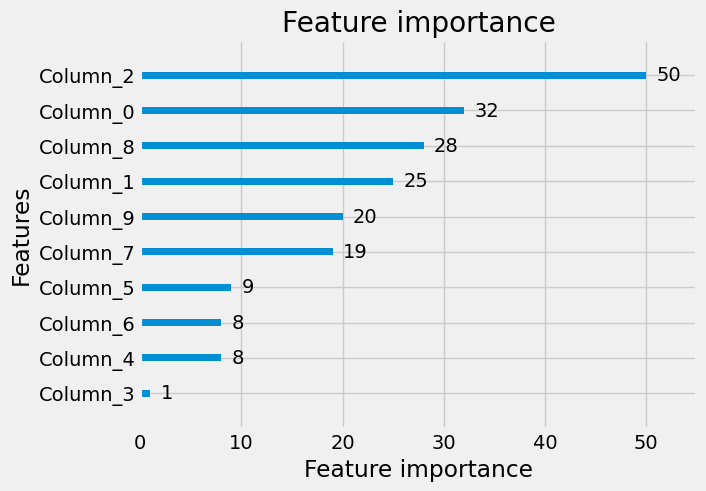

In [121]:
lgb.plot_importance(model)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l2'>

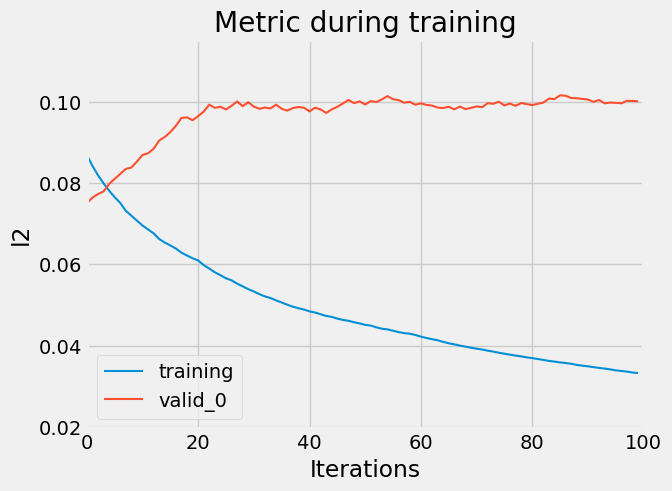

In [122]:
lgb.plot_metric(model)

We see that the model correctly predicted 56.04% of the data in the training dataset. However, the fact that the test accuracy is stated as -0.3095 indicates that the model performs poorly on the test dataset, and the accuracy value is negative, indicating that there is a situation different from normal. This situation may indicate overfitting, data leakage or poor performance. It may be caused by various reasons, such as a model showing

To improve the model's performance on the test dataset, it is necessary to analyze and fix problems that cause negative accuracy. Let's apply cross-validation between these.

In [123]:
#pip install catboost

In [124]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

# Initialize models
rf = RandomForestRegressor()
xgb = XGBRegressor()
catboost = CatBoostRegressor()

# Evaluate models
for model in [rf, xgb, catboost]:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'{model.__class__.__name__} cross-validation R^2 scores: {scores}')
    print(f'Mean cross-validation R^2 score: {np.mean(scores):.4f}')


RandomForestRegressor cross-validation R^2 scores: [-0.07614517 -0.019926   -0.23613635 -0.38836657 -0.21602712]
Mean cross-validation R^2 score: -0.1873
XGBRegressor cross-validation R^2 scores: [-0.4047092  -0.64053763 -0.75903438 -0.85434681 -0.55418621]
Mean cross-validation R^2 score: -0.6426
Learning rate set to 0.027471
0:	learn: 0.2896410	total: 151ms	remaining: 2m 30s
1:	learn: 0.2881025	total: 154ms	remaining: 1m 16s
2:	learn: 0.2868816	total: 157ms	remaining: 52.3s
3:	learn: 0.2847219	total: 160ms	remaining: 39.8s
4:	learn: 0.2831772	total: 163ms	remaining: 32.5s
5:	learn: 0.2823268	total: 166ms	remaining: 27.5s
6:	learn: 0.2809578	total: 169ms	remaining: 23.9s
7:	learn: 0.2792010	total: 171ms	remaining: 21.3s
8:	learn: 0.2776002	total: 174ms	remaining: 19.2s
9:	learn: 0.2764828	total: 178ms	remaining: 17.6s
10:	learn: 0.2752416	total: 182ms	remaining: 16.4s
11:	learn: 0.2739885	total: 186ms	remaining: 15.3s
12:	learn: 0.2721685	total: 189ms	remaining: 14.4s
13:	learn: 0.269

In [125]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1]
}

catboost = CatBoostRegressor()

grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation R^2 score: {:.4f}".format(grid_search.best_score_))

0:	learn: 0.2942995	total: 4.62ms	remaining: 458ms
1:	learn: 0.2936603	total: 8.64ms	remaining: 424ms
2:	learn: 0.2928545	total: 10.4ms	remaining: 337ms
3:	learn: 0.2922190	total: 13ms	remaining: 312ms
4:	learn: 0.2914432	total: 17.5ms	remaining: 333ms
5:	learn: 0.2907251	total: 20.9ms	remaining: 327ms
6:	learn: 0.2900876	total: 24.6ms	remaining: 327ms
7:	learn: 0.2894168	total: 27.1ms	remaining: 311ms
8:	learn: 0.2886668	total: 30.2ms	remaining: 305ms
9:	learn: 0.2878959	total: 33.1ms	remaining: 298ms
10:	learn: 0.2873636	total: 36.7ms	remaining: 297ms
11:	learn: 0.2866691	total: 40.5ms	remaining: 297ms
12:	learn: 0.2860258	total: 43ms	remaining: 287ms
13:	learn: 0.2856366	total: 46.2ms	remaining: 284ms
14:	learn: 0.2851162	total: 49.8ms	remaining: 282ms
15:	learn: 0.2846152	total: 53.5ms	remaining: 281ms
16:	learn: 0.2839627	total: 55.9ms	remaining: 273ms
17:	learn: 0.2833831	total: 58.8ms	remaining: 268ms
18:	learn: 0.2827221	total: 61.3ms	remaining: 261ms
19:	learn: 0.2822728	total

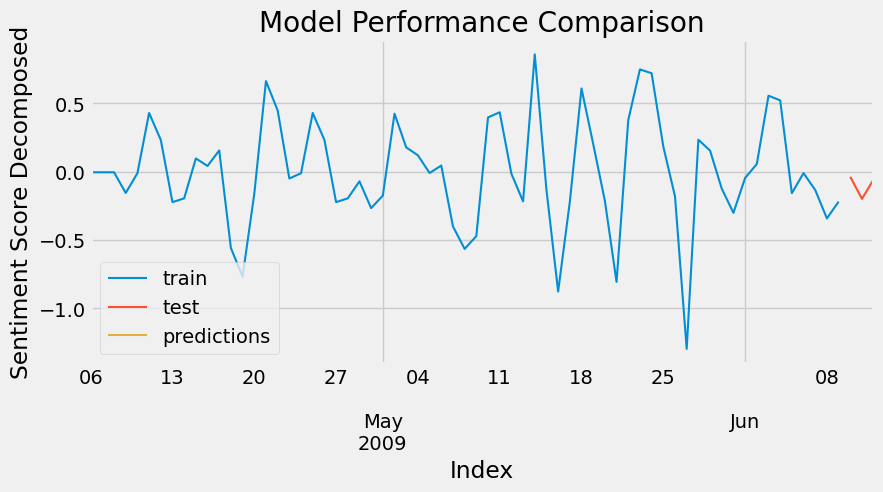

In [126]:
# Convert predictions_series to numeric values
predictions_series = predictions_series.apply(pd.to_numeric, errors='coerce')

# Plotting
fig, ax = plt.subplots(figsize=(9, 4))

# Plot training data
data_train['sentiment_score_decomposed'].plot(ax=ax, label='train')

# Plot truncated test data
data_test_truncated['sentiment_score_decomposed'].plot(ax=ax, label='test')

# Plot predictions
predictions_series.plot(ax=ax, label='predictions')

# Add legend
ax.legend()

# Add title and labels
plt.title('Model Performance Comparison')
plt.xlabel('Index')
plt.ylabel('Sentiment Score Decomposed')

# Show plot
plt.show()


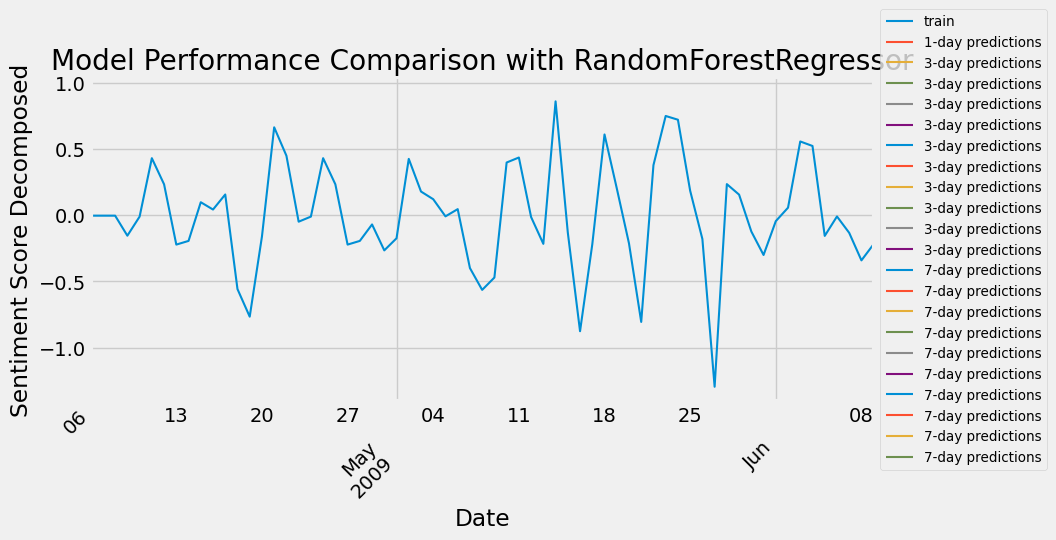

In [144]:
# Fit the model
rf.fit(X_train, y_train)

steps_1day = 1
predictions_1day = rf.predict(X_test[-1].reshape(1, -1))

steps_3days = 3
X_3days = np.array([X_test[-1]] * steps_3days)
for i in range(steps_3days):
    if i > 0:
        X_3days[i] = rf.predict(X_3days[i-1].reshape(1, -1))

steps_7days = 7
X_7days = np.array([X_test[-1]] * steps_7days)
for i in range(steps_7days):
    if i > 0:
        X_7days[i] = rf.predict(X_7days[i-1].reshape(1, -1))

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['sentiment_score_decomposed'].plot(ax=ax, label='train')
# 1 day
ax.plot(range(len(data_train), len(data_train) + steps_1day), predictions_1day, label='1-day predictions')
# 3 days
ax.plot(range(len(data_train), len(data_train) + steps_3days), X_3days, label='3-day predictions')
# 7 days
ax.plot(range(len(data_train), len(data_train) + steps_7days), X_7days, label='7-day predictions')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')

plt.title('Model Performance Comparison with RandomForestRegressor')
plt.xlabel('Date')
plt.ylabel('Sentiment Score Decomposed')

plt.xticks(rotation=45, ha='right')

plt.show()

In [135]:
# 1-Day Predictions
steps_1day = 1
predictions_1day = rf.predict(X_test[-1].reshape(1, -1))

# 3-Day Predictions
steps_3days = 3
X_3days = np.array([X_test[-1]] * steps_3days)
predictions_3days = []
for i in range(steps_3days):
    if i > 0:
        X_3days[i] = rf.predict(X_3days[i-1].reshape(1, -1))
        predictions_3days.append(X_3days[i][0])

# 7-Day Predictions
steps_7days = 7
X_7days = np.array([X_test[-1]] * steps_7days)
predictions_7days = []
for i in range(steps_7days):
    if i > 0:
        X_7days[i] = rf.predict(X_7days[i-1].reshape(1, -1))
        predictions_7days.append(X_7days[i][0])

all_predictions = {
    '1-Day Predictions': predictions_1day,
    '3-Day Predictions': predictions_3days,
    '7-Day Predictions': predictions_7days
}

for key, value in all_predictions.items():
    print(key + ":")
    print(value)

1-Day Predictions:
[0.51748752]
3-Day Predictions:
[0.5174875194306523, 0.579891219179237]
7-Day Predictions:
[0.5174875194306523, 0.579891219179237, 0.6360105819228075, 0.6578561762356017, 0.665715065382515, 0.6657912045369614]


### Dashboard

In [136]:
#pip install Flask

In [137]:
import os
print(os.getcwd())

C:\Users\deniz\2023195_IntegratedCA2


In [138]:
from IPython.display import HTML

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Predictions</title>
</head>
<body>
    <h1>Predictions</h1>
    <h2>1-Day Predictions:</h2>
    <p>{{ predictions['1-Day Predictions'] }}</p>
    <h2>3-Day Predictions:</h2>
    <p>{{ predictions['3-Day Predictions'] }}</p>
    <h2>7-Day Predictions:</h2>
    <p>{{ predictions['7-Day Predictions'] }}</p>
</body>
</html>
"""

HTML(html_content)

from IPython.display import HTML

file_path = r'C:\Users\deniz\2023195_IntegratedCA2\index.html'

with open(file_path, 'r') as file:
    html_code = file.read()

HTML(html_code)

In [146]:
def get_predictions():
    
    return all_predictions


predictions = get_predictions()


html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Predictions</title>
</head>
<body>
    <h1>Predictions</h1>
    <h2>1-Day Predictions:</h2>
    <p>{}</p>
    <h2>3-Day Predictions:</h2>
    <p>{}</p>
    <h2>7-Day Predictions:</h2>
    <p>{}</p>
</body>
</html>
""".format(predictions['1-Day Predictions'], predictions['3-Day Predictions'], predictions['7-Day Predictions'])

# HTML
HTML(html_code)

In [141]:
#pip install dash

In [148]:
import dash
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__)


def get_predictions():

    return all_predictions


predictions = get_predictions()


html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Predictions</title>
</head>
<body>
    <h1>Predictions</h1>
    <h2>1-Day Predictions:</h2>
    <p>{}</p>
    <h2>3-Day Predictions:</h2>
    <p>{}</p>
    <h2>7-Day Predictions:</h2>
    <p>{}</p>
</body>
</html>
""".format(predictions['1-Day Predictions'], predictions['3-Day Predictions'], predictions['7-Day Predictions'])


app.layout = html.Div([
    html.Div(html_code)
])

if __name__ == '__main__':
    app.run_server(debug=True)